### Khám phá Data 

In [1]:
import pandas as pd

# Đọc dữ liệu từ file CSV
file_path = 'Data.csv'
data = pd.read_csv(file_path, on_bad_lines='skip')


In [2]:
# Kiểm tra phân phối của cột 'strength' để xem có bao nhiêu mật khẩu có độ mạnh khác nhau
strength_distribution = data['strength'].value_counts()
# Chuẩn hóa phân phối để thể hiện dưới dạng phần trăm
strength_distribution_normalize = (strength_distribution / strength_distribution.sum()) * 100
print("Phân phối của độ mạnh mật khẩu trong dữ liệu gốc:")
print(strength_distribution)  # In ra phân phối của độ mạnh mật khẩu
print("Phân phối đã chuẩn hóa (%):")
print(strength_distribution_normalize)  # In ra phân phối đã chuẩn hóa dưới dạng phần trăm

Phân phối của độ mạnh mật khẩu trong dữ liệu gốc:
strength
1    496801
0     89702
2     83137
Name: count, dtype: int64
Phân phối đã chuẩn hóa (%):
strength
1    74.189266
0    13.395556
2    12.415178
Name: count, dtype: float64


In [3]:
# Xóa các hàng có giá trị bị thiếu trong cột 'password'
data_cleaned = data.dropna(subset=['password'])

# Chuyển đổi dữ liệu trong cột 'password' sang dạng chuỗi một cách an toàn
data_cleaned['password'] = data_cleaned['password'].astype(str)

# Kiểm tra lại dữ liệu sau khi xử lý
print(data_cleaned.info())
print(data_cleaned.head())

# Hàm trích xuất đặc trưng nâng cao từ mật khẩu
def extract_advanced_features(password):
    features = {
        'length': len(password),  # Độ dài của mật khẩu
        'uppercase_count': 0,     # Số ký tự viết hoa
        'lowercase_count': 0,     # Số ký tự viết thường
        'digit_count': 0,         # Số ký tự số
        'special_char_count': 0,  # Số ký tự đặc biệt
        'consecutive_digits_count': 0,  # Số nhóm ký tự số liên tiếp
        'consecutive_letters_count': 0,  # Số nhóm ký tự chữ cái liên tiếp
    }
    
    for i, char in enumerate(password):
        if char.isupper():
            features['uppercase_count'] += 1
        elif char.islower():
            features['lowercase_count'] += 1
        elif char.isdigit():
            features['digit_count'] += 1
        else:
            features['special_char_count'] += 1
        
        # Kiểm tra ký tự liên tiếp
        if i > 0:
            if char.isdigit() and password[i-1].isdigit():
                features['consecutive_digits_count'] += 1
            elif char.isalpha() and password[i-1].isalpha():
                features['consecutive_letters_count'] += 1
    
    # Tính số ký tự lặp lại và sự đa dạng của ký tự
    features['repeat_char_count'] = len(password) - len(set(password))
    features['char_variety'] = sum(1 for count in features.values() if count > 0)
    
    return features

# Áp dụng hàm trích xuất đặc trưng cho mỗi mật khẩu
data_cleaned = data_cleaned.assign(password_features=data_cleaned['password'].apply(extract_advanced_features))

# Chuyển đổi từ điển các đặc trưng thành các cột riêng biệt
feature_df = pd.DataFrame(data_cleaned['password_features'].tolist())

# Kết hợp dữ liệu gốc với các đặc trưng mới
result_df = pd.concat([data_cleaned.drop(['password_features'], axis=1), feature_df], axis=1)

# Chuyển đổi cột 'strength' sang kiểu số nguyên, thay thế NaN bằng giá trị mặc định
result_df['strength'] = result_df['strength'].fillna(-1).astype(int)

# Lưu kết quả vào file CSV
result_df.to_csv('created_feature_data.csv', index=False)

print("Dữ liệu với các đặc trưng đã được lưu vào 'created_feature_data.csv'")

# In thông tin về cột 'strength'
print("\nGiá trị duy nhất trong cột 'strength':")
print(result_df['strength'].value_counts(dropna=False))

C:\Users\User\AppData\Local\Temp\ipykernel_14108\2057792742.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['password'] = data_cleaned['password'].astype(str)


<class 'pandas.core.frame.DataFrame'>
Index: 669639 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669639 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB
None
      password  strength
0     kzde5577         1
1     kino3434         1
2    visi7k1yr         1
3     megzy123         1
4  lamborghin1         1
Dữ liệu với các đặc trưng đã được lưu vào 'created_feature_data.csv'

Giá trị duy nhất trong cột 'strength':
strength
 1    496801
 0     89701
 2     83137
-1         1
Name: count, dtype: int64


Kết quả thu được từ hàm `extract_advanced_features` sẽ bao gồm các đặc trưng (features) sau đây từ mật khẩu:

1. **length**: Độ dài của mật khẩu.
2. **uppercase_count**: Số ký tự viết hoa trong mật khẩu.
3. **lowercase_count**: Số ký tự viết thường trong mật khẩu.
4. **digit_count**: Số ký tự số trong mật khẩu.
5. **special_char_count**: Số ký tự đặc biệt trong mật khẩu (ví dụ: @, #, $, v.v.).
6. **consecutive_digits_count**: Số nhóm ký tự số liên tiếp trong mật khẩu.
7. **consecutive_letters_count**: Số nhóm ký tự chữ cái liên tiếp trong mật khẩu.
8. **repeat_char_count**: Số ký tự lặp lại trong mật khẩu.
9. **char_variety**: Số loại ký tự khác nhau có trong mật khẩu (ví dụ: số, chữ hoa, chữ thường, ký tự đặc biệt).

Những đặc trưng này sẽ giúp đánh giá độ mạnh của mật khẩu dựa trên các yếu tố khác nhau liên quan đến cấu trúc và sự đa dạng của các ký tự trong mật khẩu.

## Chuẩn bị train model 


- Tách dữ liệu thành các biến đầu vào (features) và biến mục tiêu (target).
- Biến mục tiêu là cột `strength`, trong khi các biến đầu vào là các cột đặc trưng như `length`, `uppercase_count`, `lowercase_count`, `digit_count`, `special_char_count`, `consecutive_digits_count`, `consecutive_letters_count`, `repeat_char_count`, và `char_variety`.

In [4]:
import pandas as pd
import numpy as np

# Đọc dữ liệu từ file CSV
data = pd.read_csv('created_feature_data.csv')

# Hiển thị thông tin cơ bản về dataset
print("Thông tin cơ bản về dataset:")
print(data.info())

# Hiển thị 5 dòng đầu tiên của dataset
print("\n5 dòng đầu tiên của dataset:")
print(data.head())

# Kiểm tra giá trị null
print("\nSố lượng giá trị null trong mỗi cột:")
print(data.isnull().sum())

# Kiểm tra giá trị duy nhất trong cột 'strength'
print("\nGiá trị duy nhất trong cột 'strength':")
print(data['strength'].value_counts())

# Kiểm tra thống kê mô tả của các cột số
print("\nThống kê mô tả của các cột số:")
print(data.describe())

# Kiểm tra giá trị min, max của các cột
print("\nGiá trị min, max của các cột:")
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        print(f"{column}: Min = {data[column].min()}, Max = {data[column].max()}")

# Kiểm tra xem có giá trị âm trong các cột không nên âm
columns_to_check = ['length', 'uppercase_count', 'lowercase_count', 'digit_count', 
                    'special_char_count', 'consecutive_digits_count', 
                    'consecutive_letters_count', 'repeat_char_count', 
                    'char_variety']

print("\nKiểm tra giá trị âm trong các cột:")
for column in columns_to_check:
    negative_count = (data[column] < 0).sum()
    if negative_count > 0:
        print(f"{column}: {negative_count} giá trị âm")
    else:
        print(f"{column}: Không có giá trị âm")

Thông tin cơ bản về dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   password                   669639 non-null  object 
 1   strength                   669640 non-null  int64  
 2   length                     669639 non-null  float64
 3   uppercase_count            669639 non-null  float64
 4   lowercase_count            669639 non-null  float64
 5   digit_count                669639 non-null  float64
 6   special_char_count         669639 non-null  float64
 7   consecutive_digits_count   669639 non-null  float64
 8   consecutive_letters_count  669639 non-null  float64
 9   repeat_char_count          669639 non-null  float64
 10  char_variety               669639 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 56.2+ MB
None

5 dòng đầu tiên của dataset:
      password  stren

Phân tích Data

1. Giá trị NaN (Null):
   Có một số giá trị null trong dataset:
   ```
   password                     1
   length                       1
   uppercase_count              1
   lowercase_count              1
   digit_count                  1
   special_char_count           1
   consecutive_digits_count     1
   consecutive_letters_count    1
   repeat_char_count            1
   char_variety                 1
   ```
   Mỗi cột (trừ 'strength') đều có một giá trị null. 

2. Giá trị bất thường trong cột 'strength':
   Có một giá trị -1 trong cột 'strength', trong khi các giá trị khác là 0, 1, và 2. Điều này có thể là một lỗi dữ liệu.

3. Giá trị max bất thường:
   Một số cột có giá trị max rất cao so với trung bình, ví dụ:
   - length: Max = 220.0
   - uppercase_count: Max = 80.0
   - lowercase_count: Max = 164.0
   - consecutive_letters_count: Max = 165.0
   - repeat_char_count: Max = 168.0

   Những giá trị này có thể là outliers hoặc lỗi dữ liệu.

4. Phân phối không đồng đều của 'strength':
   Có sự mất cân bằng lớn giữa các lớp trong cột 'strength':
   ```
   1    496801
   0     89701
   2     83137
   -1         1
   ```
   Điều này có thể ảnh hưởng đến hiệu suất của mô hình.

Để giải quyết các vấn đề này: 

1. Sử dụng Imputer để xử lý các giá trị null. 
2. Xem xét loại bỏ hoặc sửa đổi giá trị -1 trong cột 'strength'.
3. Kiểm tra và có thể loại bỏ các outliers.
4. Cân nhắc sử dụng kỹ thuật cân bằng lớp để xử lý sự mất cân bằng trong cột 'strength'.
> 
Việc sử dụng Imputer là cần thiết để xử lý các giá trị null trước khi đưa dữ liệu vào mô hình. 

Chúng ta loại bỏ NaN ngay trong dữ liệu. 
```python
# Đọc dữ liệu từ file CSV
data = pd.read_csv('created_feature_data.csv')

# Loại bỏ các hàng chứa giá trị NaN
data_cleaned = data.dropna()

# Kiểm tra lại xem còn giá trị NaN không
print("Số lượng giá trị NaN sau khi loại bỏ:")
print(data_cleaned.isnull().sum())
```

Nếu bài toán có nhiều NaN thì có thể xài 
```python
# Khởi tạo SimpleImputer để xử lý giá trị NaN
imputer = SimpleImputer(strategy='mean')

# Áp dụng imputer
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
```
`mean` strategy để điền vào data trống

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import joblib
import os

# Đọc dữ liệu từ file CSV
data = pd.read_csv('created_feature_data.csv')

# Tách dữ liệu thành biến đầu vào và biến mục tiêu
X = data[['length', 'uppercase_count', 'lowercase_count', 'digit_count', 
           'special_char_count', 'consecutive_digits_count', 
           'consecutive_letters_count', 'repeat_char_count', 
           'char_variety']]
y = data['strength']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo SimpleImputer để xử lý giá trị NaN
imputer = SimpleImputer(strategy='mean')

# Áp dụng imputer
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Khởi tạo và áp dụng chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Khởi tạo mô hình Logistic Regression
model = LogisticRegression(multi_class='ovr', max_iter=1000)

# Huấn luyện mô hình
model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Đánh giá mô hình
print("Độ chính xác:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Độ chính xác: 0.7589152380383489
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.29      0.02      0.03     17999
           1       0.78      0.96      0.86     99267
           2       0.60      0.38      0.47     16661

    accuracy                           0.76    133928
   macro avg       0.42      0.34      0.34    133928
weighted avg       0.69      0.76      0.70    133928



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

### Lưu model sau khi Train

In [6]:

# Lưu mô hình Logistic Regression
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(model, 'models/password_strength_model_lr.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

print("Mô hình Logistic Regression và scaler đã được lưu vào thư mục 'models'")

Mô hình Logistic Regression và scaler đã được lưu vào thư mục 'models'


#### Test nhanh

In [7]:
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler

# Hàm trích xuất đặc trưng từ mật khẩu (đã định nghĩa trước đó)
def extract_advanced_features(password):
    features = {
        'length': len(password),
        'uppercase_count': sum(1 for c in password if c.isupper()),
        'lowercase_count': sum(1 for c in password if c.islower()),
        'digit_count': sum(1 for c in password if c.isdigit()),
        'special_char_count': sum(1 for c in password if not c.isalnum()),
        'consecutive_digits_count': sum(1 for i in range(1, len(password)) if password[i].isdigit() and password[i-1].isdigit()),
        'consecutive_letters_count': sum(1 for i in range(1, len(password)) if password[i].isalpha() and password[i-1].isalpha()),
        'repeat_char_count': len(password) - len(set(password)),
        'char_variety': sum(1 for count in [sum(1 for c in password if c.isupper()), 
                                            sum(1 for c in password if c.islower()),
                                            sum(1 for c in password if c.isdigit()),
                                            sum(1 for c in password if not c.isalnum())] if count > 0)
    }
    return features

# Hàm kiểm tra độ mạnh của mật khẩu
def test_password_strength(password):
    # Tải mô hình và scaler đã lưu
    model = joblib.load('models/password_strength_model_lr.pkl')
    scaler = joblib.load('models/scaler.pkl')
    
    # Trích xuất đặc trưng từ mật khẩu
    features = extract_advanced_features(password)
    
    # Chuyển đổi đặc trưng thành mảng numpy
    feature_array = np.array([list(features.values())])
    
    # Chuẩn hóa đặc trưng
    feature_scaled = scaler.transform(feature_array)
    
    # Dự đoán độ mạnh của mật khẩu
    strength = model.predict(feature_scaled)[0]
    
    # Chuyển đổi độ mạnh thành mô tả
    strength_description = {
        0: "Yếu",
        1: "Trung Bình",
        2: "Mạnh",
    }
    
    return strength_description.get(strength, "Không xác định")

# Sử dụng hàm để kiểm tra mật khẩu
password = "12"
result = test_password_strength(password)
print(f"Độ mạnh của mật khẩu: {result}")

Độ mạnh của mật khẩu: Yếu


### Naive Bayes Model 

In [8]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import joblib
import os

# Đọc dữ liệu từ file CSV
data = pd.read_csv('created_feature_data.csv')

# Tách dữ liệu thành biến đầu vào và biến mục tiêu
X = data[['length', 'uppercase_count', 'lowercase_count', 'digit_count', 
           'special_char_count', 'consecutive_digits_count', 
           'consecutive_letters_count', 'repeat_char_count', 
           'char_variety']]
y = data['strength']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo SimpleImputer để xử lý giá trị NaN (giá trị rỗng)
imputer = SimpleImputer(strategy='mean')

# Áp dụng imputer
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Khởi tạo và áp dụng chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Naive Bayes Classifier
print("\nNaive Bayes Classifier:")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_pred = nb_model.predict(X_test_scaled)
print("Độ chính xác:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

# Lưu mô hình Naive Bayes
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(nb_model, 'models/password_strength_model_nb.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

print("Mô hình Naive Bayes, scaler và imputer đã được lưu vào thư mục 'models'")


Naive Bayes Classifier:
Độ chính xác: 0.775692909623081
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.52      0.48      0.50     17999
           1       0.86      0.86      0.86     99267
           2       0.55      0.59      0.57     16661

    accuracy                           0.78    133928
   macro avg       0.48      0.48      0.48    133928
weighted avg       0.77      0.78      0.77    133928

Mô hình Naive Bayes, scaler và imputer đã được lưu vào thư mục 'models'


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

### Random Forest

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import joblib
import os

# Đọc dữ liệu từ file CSV
data = pd.read_csv('created_feature_data.csv')

# Tách dữ liệu thành biến đầu vào và biến mục tiêu
X = data[['length', 'uppercase_count', 'lowercase_count', 'digit_count', 
           'special_char_count', 'consecutive_digits_count', 
           'consecutive_letters_count', 'repeat_char_count', 
           'char_variety']]
y = data['strength']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo SimpleImputer để xử lý giá trị NaN
imputer = SimpleImputer(strategy='mean')

# Áp dụng imputer
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Khởi tạo và áp dụng chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Random Forest Classifier
print("Random Forest Classifier:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
print("Độ chính xác:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Lưu mô hình Random Forest
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(rf_model, 'models/password_strength_model_rf.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

print("Mô hình Random Forest, scaler và imputer đã được lưu vào thư mục 'models'")

Random Forest Classifier:
Độ chính xác: 0.8080610477271369
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.61      0.61      0.61     17999
           1       0.88      0.89      0.88     99267
           2       0.60      0.55      0.57     16661

    accuracy                           0.81    133928
   macro avg       0.52      0.51      0.52    133928
weighted avg       0.81      0.81      0.81    133928

Mô hình Random Forest, scaler và imputer đã được lưu vào thư mục 'models'


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

Lúc run demo có bug liên quan đến việc không tương thích của sklearn lúc train model và lúc demo. Do lúc train xài python 11, lúc demo trong .venv xài python 12

```terminal
   python -c "import sklearn; print(sklearn.__version__)"
```
1.5.2

In [10]:
import sklearn
print(sklearn.__version__)

1.5.2


#### Biểu diễn thêm trực quan hoá thêm <PHẦN MODEL ĐÃ TRAIN XONG Ở TRÊN RỒI - PHẦN BIỂU DIỄN THÊM>

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib
import os
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Trực quan hoá Logistics Regression 


Logistic Regression:
Độ chính xác: 0.7643509945642435
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.46      0.05      0.09     17999
           1       0.79      0.95      0.86     99267
           2       0.60      0.42      0.50     16661

    accuracy                           0.76    133928
   macro avg       0.46      0.36      0.36    133928
weighted avg       0.72      0.76      0.71    133928



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

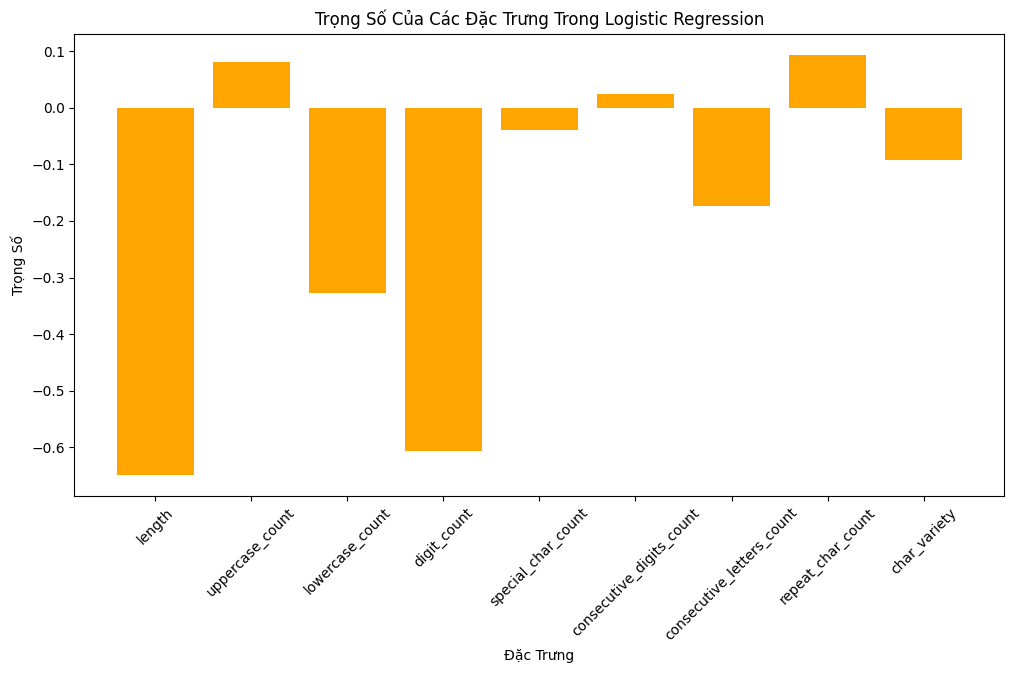

Phần chặn (Intercept): [-0.71498738  1.48202111 -0.76703372]


In [12]:
# Logistic Regression
print("\nLogistic Regression:")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print("Độ chính xác:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

# Trực quan hóa trọng số của các đặc trưng (Logistic Regression)
plt.figure(figsize=(12, 6))
plt.bar(X.columns, lr_model.coef_[0], color='orange')
plt.title('Trọng Số Của Các Đặc Trưng Trong Logistic Regression')
plt.xlabel('Đặc Trưng')
plt.ylabel('Trọng Số')
plt.xticks(rotation=45)
plt.show()

print("Phần chặn (Intercept):", lr_model.intercept_)

Trực quan hoá Naive Bayes


Naive Bayes Classifier:
Độ chính xác: 0.775692909623081
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.52      0.48      0.50     17999
           1       0.86      0.86      0.86     99267
           2       0.55      0.59      0.57     16661

    accuracy                           0.78    133928
   macro avg       0.48      0.48      0.48    133928
weighted avg       0.77      0.78      0.77    133928



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

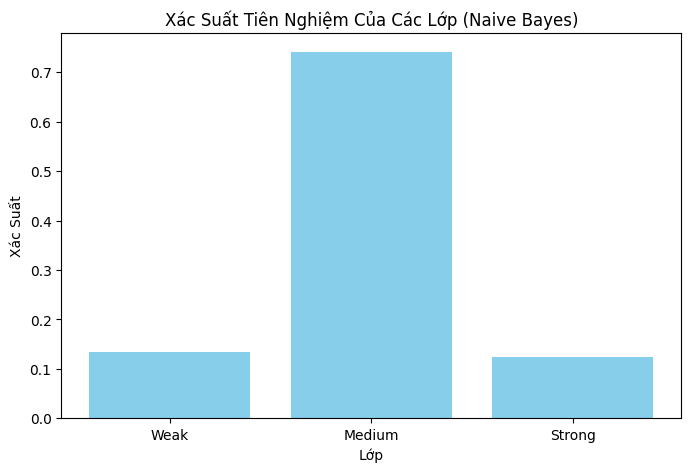

In [13]:
# Naive Bayes Classifier
print("\nNaive Bayes Classifier:")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_pred = nb_model.predict(X_test_scaled)
print("Độ chính xác:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

# Xác suất tiên nghiệm của các lớp (Naive Bayes)
plt.figure(figsize=(8, 5))
plt.bar(['Weak', 'Medium', 'Strong'], nb_model.class_prior_, color='skyblue')
plt.title('Xác Suất Tiên Nghiệm Của Các Lớp (Naive Bayes)')
plt.xlabel('Lớp')
plt.ylabel('Xác Suất')
plt.show()

Trực quan hoá Random Forest

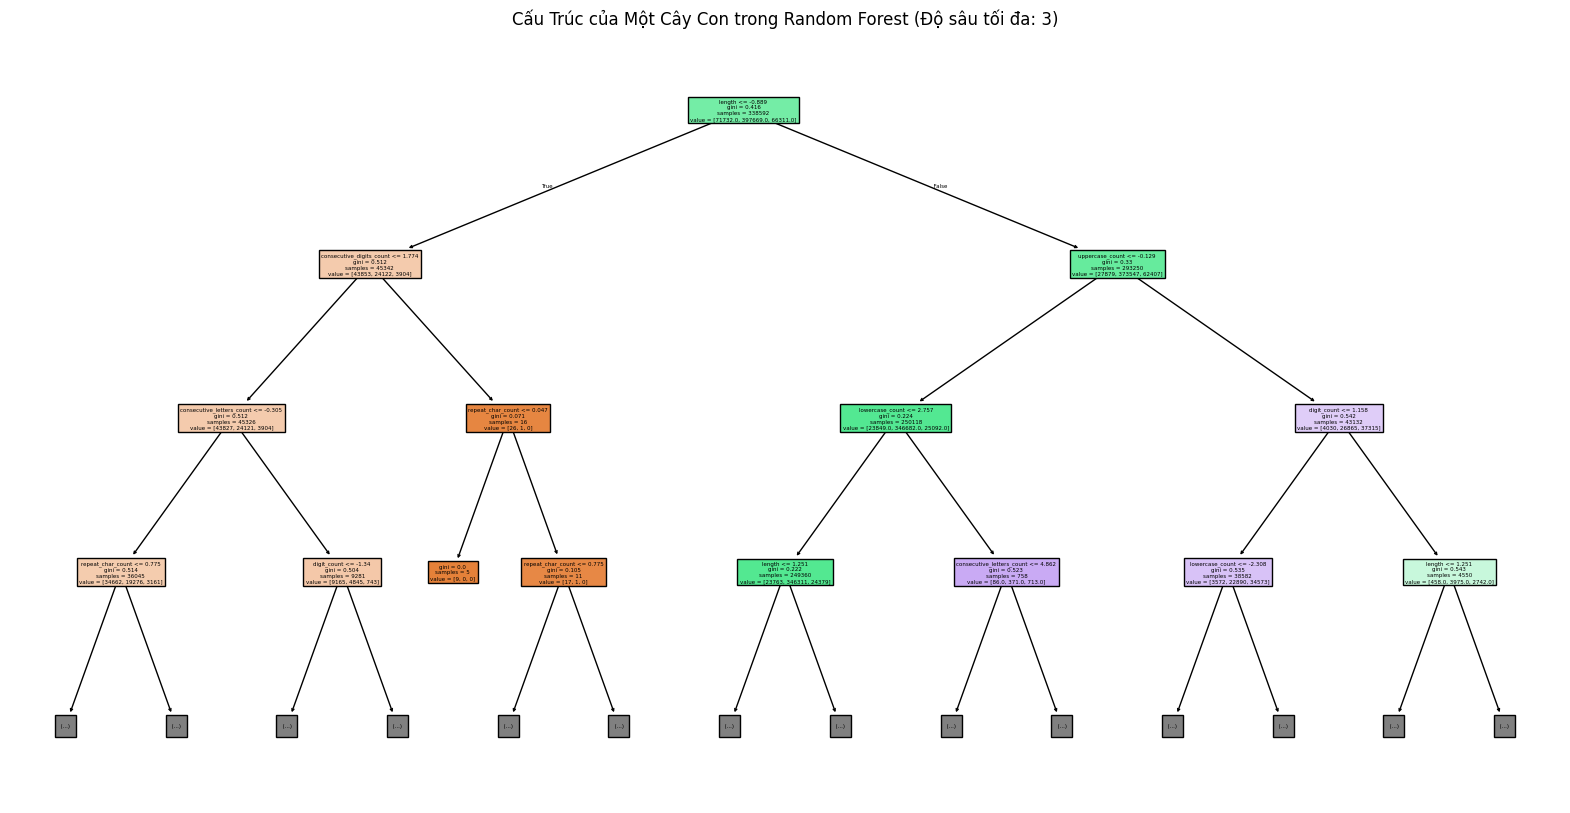

Feature Importances:
 length                       0.510303
uppercase_count              0.192338
consecutive_letters_count    0.085555
lowercase_count              0.053115
char_variety                 0.048519
digit_count                  0.041787
repeat_char_count            0.031372
consecutive_digits_count     0.028689
special_char_count           0.008321
dtype: float64


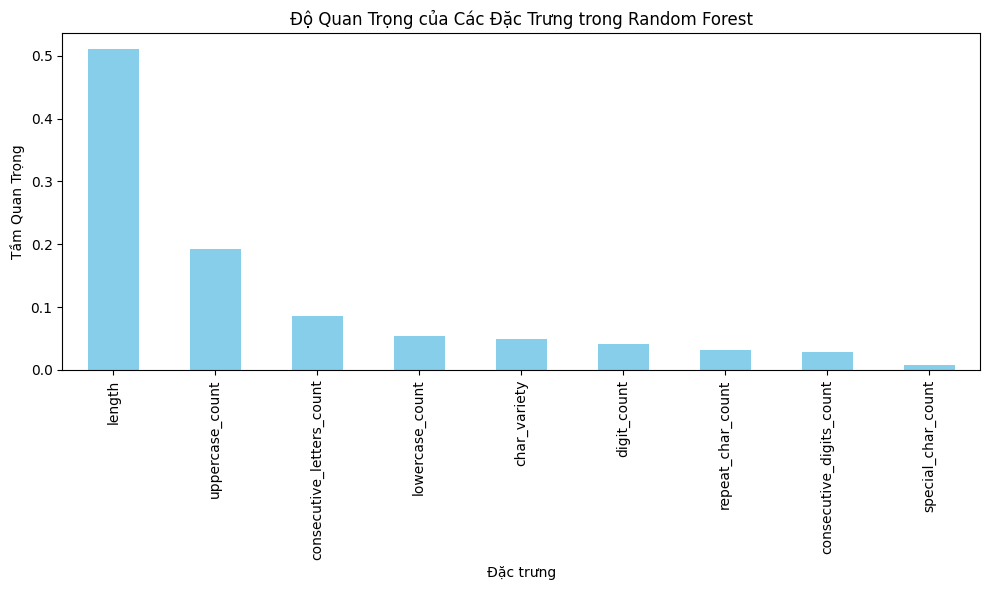

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Hiển thị cấu trúc của một cây con trong Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True, max_depth=3)
plt.title("Cấu Trúc của Một Cây Con trong Random Forest (Độ sâu tối đa: 3)")
plt.show()

# Phân tích độ quan trọng của các đặc trưng
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

# Trực quan hóa độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.xlabel('Đặc trưng')
plt.ylabel('Tầm Quan Trọng')
plt.title('Độ Quan Trọng của Các Đặc Trưng trong Random Forest')
plt.tight_layout()
plt.show()

# 2. Xử lý Outlier 

Cho bộ dữ liệu về mật khẩu này, chúng ta sử dụng phương pháp IQR (Interquartile Range) để phát hiện outlier. 

**Lý do chọn phương pháp IQR:**

1. **Phù hợp với đặc điểm dữ liệu:**
   - Dữ liệu mật khẩu có các đặc trưng như length, count các ký tự thường không tuân theo phân phối chuẩn
   - IQR không yêu cầu dữ liệu phải có phân phối chuẩn (như phương pháp Z-score)
   - IQR ít nhạy cảm với các giá trị extreme values

2. **Robust với extreme values:**
   - Trong mật khẩu, có thể có những trường hợp rất dài hoặc có rất nhiều ký tự đặc biệt
   - IQR dựa trên median và quartiles nên ít bị ảnh hưởng bởi các giá trị này
   - Z-score dựa trên mean và std sẽ bị ảnh hưởng nhiều hơn

3. **Dễ hiểu và giải thích:**
   - Phương pháp trực quan, dễ hiểu với box plot
   - Có thể giải thích cho người không chuyên về thống kê




1. **Phân tích từng feature:**
   - Tính Q1, Q3, IQR và bounds cho mỗi cột
   - Xác định outliers dựa trên bounds
   - Tính toán các thống kê quan trọng

2. **Visualize kết quả:**
   - Box plot: Hiển thị phân phối và outliers
   - Histogram với KDE: Xem phân phối và vị trí bounds
   - Scatter plot: Xem phân bố outliers theo index

3. **Thống kê chi tiết:**
   - Số lượng và tỷ lệ outliers
   - Các ngưỡng giới hạn
   - Thông tin về phân phối (Q1, Q3, IQR)


Từ kết quả này, ta có thể quyết định:
- Features nào cần xử lý outliers
- Phương pháp xử lý phù hợp cho từng feature
- Ngưỡng xử lý có nên điều chỉnh không

C:\Users\User\AppData\Local\Temp\ipykernel_14108\1031845657.py:87: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


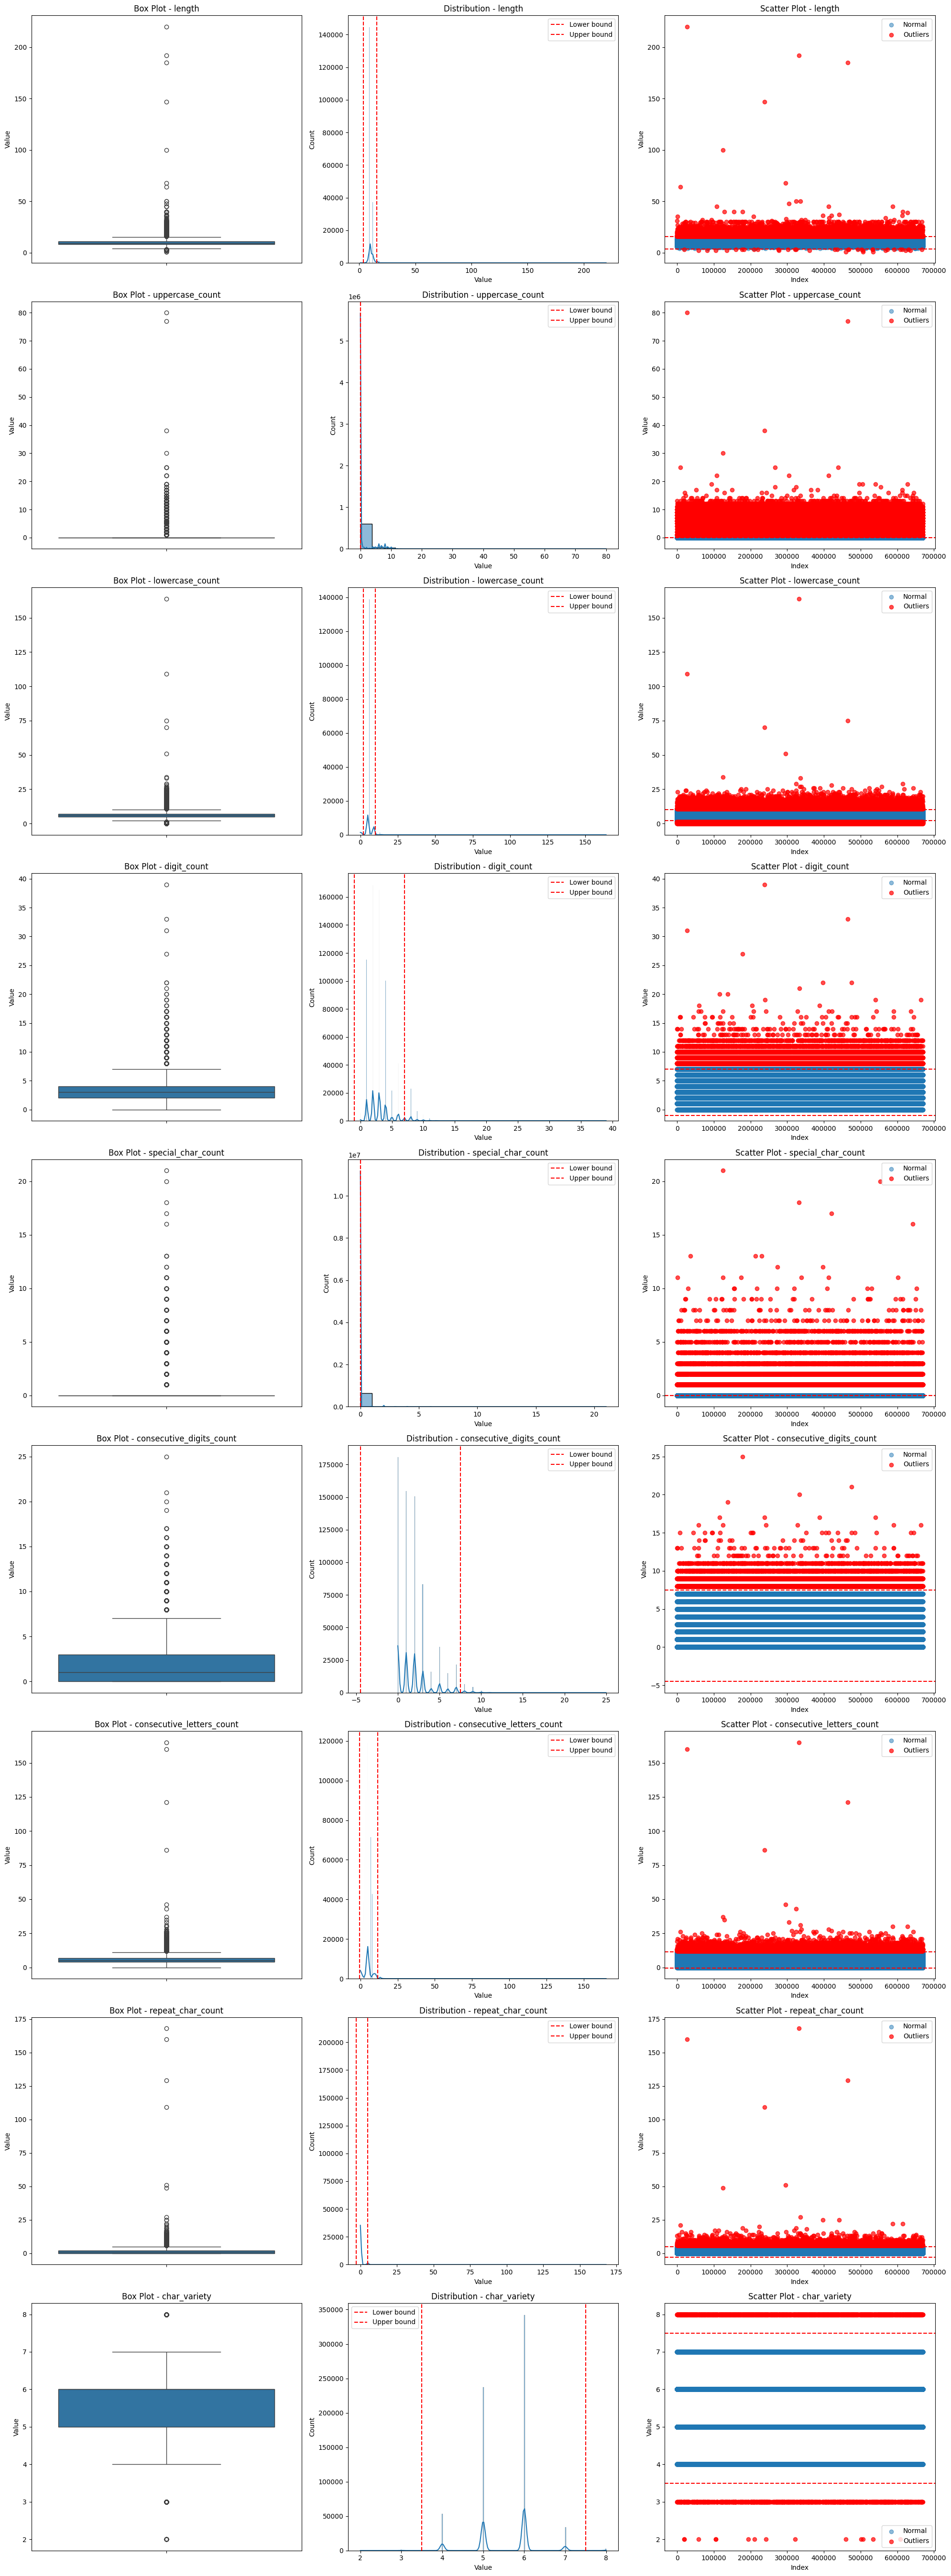


=== BÁO CÁO PHÂN TÍCH OUTLIERS ===

--------------------------------------------------
Feature: length
--------------------------------------------------
1. Thống kê cơ bản:
   - Tổng số mẫu: 669,640
   - Giá trị min: 1.00
   - Giá trị max: 220.00
   - Trung bình: 9.99
   - Trung vị: 9.00

2. Phân tích outliers:
   - Số lượng outliers: 62,485
   - Tỷ lệ outliers: 9.33%
   - Ngưỡng dưới: 3.50
   - Ngưỡng trên: 15.50

3. Thông tin phân phối:
   - Q1: 8.00
   - Q3: 11.00
   - IQR: 3.00

--------------------------------------------------
Feature: uppercase_count
--------------------------------------------------
1. Thống kê cơ bản:
   - Tổng số mẫu: 669,640
   - Giá trị min: 0.00
   - Giá trị max: 80.00
   - Trung bình: 0.79
   - Trung vị: 0.00

2. Phân tích outliers:
   - Số lượng outliers: 87,164
   - Tỷ lệ outliers: 13.02%
   - Ngưỡng dưới: 0.00
   - Ngưỡng trên: 0.00

3. Thông tin phân phối:
   - Q1: 0.00
   - Q3: 0.00
   - IQR: 0.00

--------------------------------------------------

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
data_original = pd.read_csv('created_feature_data.csv')

# Định nghĩa các cột số cần phân tích
numeric_columns = ['length', 'uppercase_count', 'lowercase_count', 'digit_count',
                  'special_char_count', 'consecutive_digits_count',
                  'consecutive_letters_count', 'repeat_char_count',
                  'char_variety']

def analyze_outliers_with_iqr(data, columns):
    """
    Phân tích outliers cho các features của mật khẩu sử dụng phương pháp IQR
    """
    outlier_stats = {}
    
    # Tạo subplot grid
    n_cols = 3
    n_rows = len(columns)
    plt.figure(figsize=(20, 6*n_rows))
    
    for idx, col in enumerate(columns, 1):
        # 1. Tính các ngưỡng IQR
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 2. Xác định outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
        
        # 3. Tính các thống kê
        stats = {
            'total_count': len(data),
            'outlier_count': len(outliers),
            'outlier_percentage': (len(outliers) / len(data)) * 100,
            'min': data[col].min(),
            'max': data[col].max(),
            'mean': data[col].mean(),
            'median': data[col].median(),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR
        }
        outlier_stats[col] = stats
        
        # 4. Vẽ biểu đồ phân tích
        # Box Plot
        plt.subplot(n_rows, n_cols, (idx-1)*n_cols + 1)
        sns.boxplot(y=data[col])
        plt.title(f'Box Plot - {col}')
        plt.ylabel('Value')
        
        # Histogram với KDE
        plt.subplot(n_rows, n_cols, (idx-1)*n_cols + 2)
        sns.histplot(data[col], kde=True)
        plt.axvline(lower_bound, color='r', linestyle='--', label='Lower bound')
        plt.axvline(upper_bound, color='r', linestyle='--', label='Upper bound')
        plt.legend()
        plt.title(f'Distribution - {col}')
        plt.xlabel('Value')
        plt.ylabel('Count')
        
        # Scatter Plot với bounds
        plt.subplot(n_rows, n_cols, (idx-1)*n_cols + 3)
        non_outliers = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
        outliers_data = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        
        plt.scatter(non_outliers.index, non_outliers[col], 
                   alpha=0.5, label='Normal')
        plt.scatter(outliers_data.index, outliers_data[col], 
                   color='red', alpha=0.7, label='Outliers')
        plt.axhline(lower_bound, color='r', linestyle='--')
        plt.axhline(upper_bound, color='r', linestyle='--')
        plt.legend()
        plt.title(f'Scatter Plot - {col}')
        plt.xlabel('Index')
        plt.ylabel('Value')
    
    plt.tight_layout()
    plt.show()
    
    # 5. In báo cáo chi tiết
    print("\n=== BÁO CÁO PHÂN TÍCH OUTLIERS ===")
    for col, stats in outlier_stats.items():
        print(f"\n{'-'*50}")
        print(f"Feature: {col}")
        print(f"{'-'*50}")
        print(f"1. Thống kê cơ bản:")
        print(f"   - Tổng số mẫu: {stats['total_count']:,}")
        print(f"   - Giá trị min: {stats['min']:.2f}")
        print(f"   - Giá trị max: {stats['max']:.2f}")
        print(f"   - Trung bình: {stats['mean']:.2f}")
        print(f"   - Trung vị: {stats['median']:.2f}")
        
        print(f"\n2. Phân tích outliers:")
        print(f"   - Số lượng outliers: {stats['outlier_count']:,}")
        print(f"   - Tỷ lệ outliers: {stats['outlier_percentage']:.2f}%")
        print(f"   - Ngưỡng dưới: {stats['lower_bound']:.2f}")
        print(f"   - Ngưỡng trên: {stats['upper_bound']:.2f}")
        
        print(f"\n3. Thông tin phân phối:")
        print(f"   - Q1: {stats['Q1']:.2f}")
        print(f"   - Q3: {stats['Q3']:.2f}")
        print(f"   - IQR: {stats['IQR']:.2f}")
        
    return outlier_stats

# Chạy phân tích
outlier_stats = analyze_outliers_with_iqr(data_original, numeric_columns)


**Giải thích kết quả:**

1. **Với mỗi feature, chúng ta xem xét:**

   - **Box Plot**: 
     - Các điểm nằm ngoài whiskers là outliers
     - Box cho thấy phân phối chung của dữ liệu
   
   - **Histogram với KDE**: 
     - Xem phân phối tổng thể
     - Các đường đứt nét đỏ là ngưỡng outliers
   
   - **Scatter Plot**:
     - Điểm đỏ là outliers
     - Điểm xanh là dữ liệu bình thường
     - Thấy được phân bố outliers theo thời gian

2. **Báo cáo chi tiết cho mỗi feature:**

   - **Thống kê cơ bản**: min, max, mean, median
   - **Phân tích outliers**: số lượng, tỷ lệ, ngưỡng
   - **Thông tin phân phối**: Q1, Q3, IQR

3. **Đánh giá chung:**
   - Features nào có nhiều outliers nhất?
   - Outliers có phân bố như thế nào?
   - Có features nào cần điều chỉnh ngưỡng phát hiện không?

Dựa vào kết quả này, bạn có thể:
1. Xác định features nào cần ưu tiên xử lý outliers
2. Chọn phương pháp xử lý phù hợp cho từng feature
3. Điều chỉnh ngưỡng phát hiện nếu cần

Kết quả sau khi chạy code 

```bash
=== BÁO CÁO PHÂN TÍCH OUTLIERS ===

--------------------------------------------------
Feature: length
--------------------------------------------------
1. Thống kê cơ bản:
   - Tổng số mẫu: 669,640
   - Giá trị min: 1.00
   - Giá trị max: 220.00
   - Trung bình: 9.99
   - Trung vị: 9.00

2. Phân tích outliers:
   - Số lượng outliers: 62,485
   - Tỷ lệ outliers: 9.33%
   - Ngưỡng dưới: 3.50
   - Ngưỡng trên: 15.50

3. Thông tin phân phối:
   - Q1: 8.00
   - Q3: 11.00
   - IQR: 3.00

--------------------------------------------------
Feature: uppercase_count
--------------------------------------------------
1. Thống kê cơ bản:
   - Tổng số mẫu: 669,640
   - Giá trị min: 0.00
   - Giá trị max: 80.00
   - Trung bình: 0.79
   - Trung vị: 0.00

2. Phân tích outliers:
   - Số lượng outliers: 87,164
   - Tỷ lệ outliers: 13.02%
   - Ngưỡng dưới: 0.00
   - Ngưỡng trên: 0.00

3. Thông tin phân phối:
   - Q1: 0.00
   - Q3: 0.00
   - IQR: 0.00

--------------------------------------------------
Feature: lowercase_count
--------------------------------------------------
1. Thống kê cơ bản:
   - Tổng số mẫu: 669,640
   - Giá trị min: 0.00
   - Giá trị max: 164.00
   - Trung bình: 5.97
   - Trung vị: 6.00

2. Phân tích outliers:
   - Số lượng outliers: 46,531
   - Tỷ lệ outliers: 6.95%
   - Ngưỡng dưới: 2.00
   - Ngưỡng trên: 10.00

3. Thông tin phân phối:
   - Q1: 5.00
   - Q3: 7.00
   - IQR: 2.00

--------------------------------------------------
Feature: digit_count
--------------------------------------------------
1. Thống kê cơ bản:
   - Tổng số mẫu: 669,640
   - Giá trị min: 0.00
   - Giá trị max: 39.00
   - Trung bình: 3.18
   - Trung vị: 3.00

2. Phân tích outliers:
   - Số lượng outliers: 36,806
   - Tỷ lệ outliers: 5.50%
   - Ngưỡng dưới: -1.00
   - Ngưỡng trên: 7.00

3. Thông tin phân phối:
   - Q1: 2.00
   - Q3: 4.00
   - IQR: 2.00

--------------------------------------------------
Feature: special_char_count
--------------------------------------------------
1. Thống kê cơ bản:
   - Tổng số mẫu: 669,640
   - Giá trị min: 0.00
   - Giá trị max: 21.00
   - Trung bình: 0.05
   - Trung vị: 0.00

2. Phân tích outliers:
   - Số lượng outliers: 18,751
   - Tỷ lệ outliers: 2.80%
   - Ngưỡng dưới: 0.00
   - Ngưỡng trên: 0.00

3. Thông tin phân phối:
   - Q1: 0.00
   - Q3: 0.00
   - IQR: 0.00

--------------------------------------------------
Feature: consecutive_digits_count
--------------------------------------------------
1. Thống kê cơ bản:
   - Tổng số mẫu: 669,640
   - Giá trị min: 0.00
   - Giá trị max: 25.00
   - Trung bình: 1.94
   - Trung vị: 1.00

2. Phân tích outliers:
   - Số lượng outliers: 12,880
   - Tỷ lệ outliers: 1.92%
   - Ngưỡng dưới: -4.50
   - Ngưỡng trên: 7.50

3. Thông tin phân phối:
   - Q1: 0.00
   - Q3: 3.00
   - IQR: 3.00

--------------------------------------------------
Feature: consecutive_letters_count
--------------------------------------------------
1. Thống kê cơ bản:
   - Tổng số mẫu: 669,640
   - Giá trị min: 0.00
   - Giá trị max: 165.00
   - Trung bình: 5.39
   - Trung vị: 5.00

2. Phân tích outliers:
   - Số lượng outliers: 21,795
   - Tỷ lệ outliers: 3.25%
   - Ngưỡng dưới: -0.50
   - Ngưỡng trên: 11.50

3. Thông tin phân phối:
   - Q1: 4.00
   - Q3: 7.00
   - IQR: 3.00

--------------------------------------------------
Feature: repeat_char_count
--------------------------------------------------
1. Thống kê cơ bản:
   - Tổng số mẫu: 669,640
   - Giá trị min: 0.00
   - Giá trị max: 168.00
   - Trung bình: 1.44
   - Trung vị: 1.00

2. Phân tích outliers:
   - Số lượng outliers: 7,351
   - Tỷ lệ outliers: 1.10%
   - Ngưỡng dưới: -3.00
   - Ngưỡng trên: 5.00

3. Thông tin phân phối:
   - Q1: 0.00
   - Q3: 2.00
   - IQR: 2.00

--------------------------------------------------
Feature: char_variety
--------------------------------------------------
1. Thống kê cơ bản:
   - Tổng số mẫu: 669,640
   - Giá trị min: 2.00
   - Giá trị max: 8.00
   - Trung bình: 5.54
   - Trung vị: 6.00

2. Phân tích outliers:
   - Số lượng outliers: 3,593
   - Tỷ lệ outliers: 0.54%
   - Ngưỡng dưới: 3.50
   - Ngưỡng trên: 7.50

3. Thông tin phân phối:
   - Q1: 5.00
   - Q3: 6.00
   - IQR: 1.00

```

## 2.1 Phân tích kết quả 

## 2.2 Giải thích chi tiết báo cáo về **outliers** cho học sinh cấp 2 (dễ hiểu và chi tiết)

---

Báo cáo trên đã phân tích các đặc trưng (features) của mật khẩu như **độ dài**, **số ký tự in hoa**, **số chữ cái thường**, **số chữ số**, **số ký tự đặc biệt**,... để tìm ra những **outliers** (giá trị ngoại lai). 

**Outliers** là những giá trị **quá cao** hoặc **quá thấp** so với các giá trị khác, làm cho chúng trở nên khác biệt. Hãy tưởng tượng rằng nếu chiều cao trung bình của các bạn trong lớp là từ **150cm đến 160cm**, nhưng có một bạn cao đến **190cm** thì bạn đó có thể là một **outlier**.

---

### Giải thích từng phần của báo cáo:

1. **Feature: length (độ dài mật khẩu)**

   - **Tổng số mẫu**: Có tổng cộng **669,640** mật khẩu được phân tích.
   - **Giá trị nhỏ nhất (min)**: Mật khẩu ngắn nhất có **1** ký tự.
   - **Giá trị lớn nhất (max)**: Mật khẩu dài nhất có **220** ký tự.
   - **Trung bình (mean)**: Độ dài trung bình của mật khẩu là **9.99** ký tự.
   - **Trung vị (median)**: Độ dài trung vị là **9** ký tự (nghĩa là một nửa số mật khẩu dài hơn 9 ký tự, và một nửa ngắn hơn).
   
   **Phân tích outliers:**
   - **Ngưỡng dưới**: 3.5 ký tự
   - **Ngưỡng trên**: 15.5 ký tự
   - Những mật khẩu có **ít hơn 3.5 ký tự hoặc nhiều hơn 15.5 ký tự** được coi là **outliers**.
   - Có tổng cộng **62,485** mật khẩu là outliers, chiếm khoảng **9.33%** tổng số mẫu.

   📝 **Hiểu đơn giản**: Phần lớn mật khẩu dài khoảng từ 8 đến 11 ký tự, nhưng có một số mật khẩu **quá dài** hoặc **quá ngắn** so với mức trung bình.

---

2. **Feature: uppercase_count (số ký tự in hoa)**

   - **Min**: 0 (một số mật khẩu không có ký tự in hoa nào).
   - **Max**: 80 (một số mật khẩu có đến **80** ký tự in hoa).
   - **Trung bình**: Chỉ có **0.79** ký tự in hoa trong mật khẩu.
   - **Trung vị**: 0 (nghĩa là hơn một nửa số mật khẩu **không có ký tự in hoa**).

   **Phân tích outliers:**
   - **Ngưỡng dưới và trên**: Đều là **0**.
   - Điều này có nghĩa là **hầu hết mật khẩu đều không có ký tự in hoa**. Những mật khẩu có rất nhiều ký tự in hoa (như 80) là outliers.

   📝 **Hiểu đơn giản**: Phần lớn mật khẩu không dùng ký tự in hoa, chỉ có một số rất ít mật khẩu dùng nhiều ký tự in hoa **một cách bất thường**.

---

3. **Feature: digit_count (số chữ số)**

   - **Min**: 0 (một số mật khẩu không có chữ số).
   - **Max**: 39 (một số mật khẩu có đến **39** chữ số).
   - **Trung bình**: Mật khẩu trung bình có khoảng **3.18** chữ số.
   - **Trung vị**: 3 chữ số.

   **Phân tích outliers:**
   - **Ngưỡng dưới**: -1 (thực ra không có mật khẩu nào âm, nên ngưỡng này chỉ là lý thuyết).
   - **Ngưỡng trên**: 7 chữ số.
   - Những mật khẩu có hơn **7 chữ số** là outliers.

   📝 **Hiểu đơn giản**: Hầu hết mật khẩu có từ 2 đến 4 chữ số, nhưng nếu mật khẩu có quá nhiều chữ số (như 39 chữ số), nó trở thành **outlier**.

---

4. **Feature: special_char_count (số ký tự đặc biệt)**

   - **Min**: 0 (nhiều mật khẩu không có ký tự đặc biệt).
   - **Max**: 21 ký tự đặc biệt.
   - **Trung bình**: **0.05** ký tự đặc biệt.
   - **Trung vị**: 0 ký tự đặc biệt.

   **Phân tích outliers:**
   - **Ngưỡng dưới và trên**: Đều là **0**.
   - Điều này có nghĩa là mật khẩu thường **không có ký tự đặc biệt**. Những mật khẩu có **nhiều ký tự đặc biệt** là outliers.

   📝 **Hiểu đơn giản**: Phần lớn mật khẩu không dùng ký tự đặc biệt, chỉ một số ít có quá nhiều ký tự đặc biệt.

---

5. **Feature: char_variety (độ đa dạng ký tự)**

   - **Min**: 2 (ít nhất có 2 loại ký tự khác nhau).
   - **Max**: 8 (có đến 8 loại ký tự khác nhau).
   - **Trung bình**: **5.54** loại ký tự khác nhau.
   - **Trung vị**: 6 loại ký tự.

   **Phân tích outliers:**
   - **Ngưỡng dưới**: 3.5 loại ký tự
   - **Ngưỡng trên**: 7.5 loại ký tự
   - Những mật khẩu có **ít hơn 3.5 loại ký tự hoặc nhiều hơn 7.5 loại** được coi là outliers.

   📝 **Hiểu đơn giản**: Phần lớn mật khẩu có khoảng 5 đến 6 loại ký tự khác nhau. Những mật khẩu **quá đơn giản** (chỉ có 2 loại ký tự) hoặc **quá phức tạp** (có đến 8 loại ký tự) là outliers.

---

### Tóm tắt:

Báo cáo này giúp chúng ta hiểu rõ hơn về **các đặc điểm của mật khẩu** và phát hiện ra những **mật khẩu bất thường**. Từ đó, chúng ta có thể cải thiện tính bảo mật của hệ thống bằng cách tránh sử dụng các mật khẩu quá đơn giản hoặc quá phức tạp. 




**Giải thích code:**

1. **Xử lý từng feature:**
   - Tính Q1, Q3, IQR và bounds cho mỗi cột
   - Điều chỉnh lower_bound >= 0 cho một số features đặc biệt
   - Áp dụng phương pháp xử lý đã chọn

2. **Hai phương pháp xử lý:**
   - `clip`: Giữ lại tất cả mẫu nhưng giới hạn giá trị trong bounds
   - `remove`: Loại bỏ hoàn toàn các mẫu có outlier

3. **Visualization kết quả:**
   - Box plot so sánh trước và sau xử lý
   - Sử dụng log scale để dễ nhìn với dữ liệu có range lớn

4. **Báo cáo chi tiết:**
   - Số lượng mẫu trước/sau
   - Tỷ lệ giữ lại
   - Các ngưỡng đã sử dụng

**Lựa chọn phương pháp:**
- Với dữ liệu mật khẩu, tôi khuyến nghị dùng phương pháp `clip` vì:
  + Không làm mất mẫu (quan trọng với dữ liệu bảo mật)
  + Vẫn giữ được đặc trưng của mật khẩu
  + Tránh mất mối tương quan giữa các features

Bạn có thể thử cả hai phương pháp và so sánh kết quả để chọn phương pháp phù hợp nhất với nhu cầu của mình.

Đang đọc dữ liệu...
Đang xử lý outliers...
Đang vẽ biểu đồ so sánh...


C:\Users\User\AppData\Local\Temp\ipykernel_14108\2965413794.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_original[col], data_cleaned[col]],
C:\Users\User\AppData\Local\Temp\ipykernel_14108\2965413794.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_original[col], data_cleaned[col]],
C:\Users\User\AppData\Local\Temp\ipykernel_14108\2965413794.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_original[col], data_cleaned[col]],
C:\Users\User\AppData\Local\Temp\ipykernel_14108\2965413794.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxp

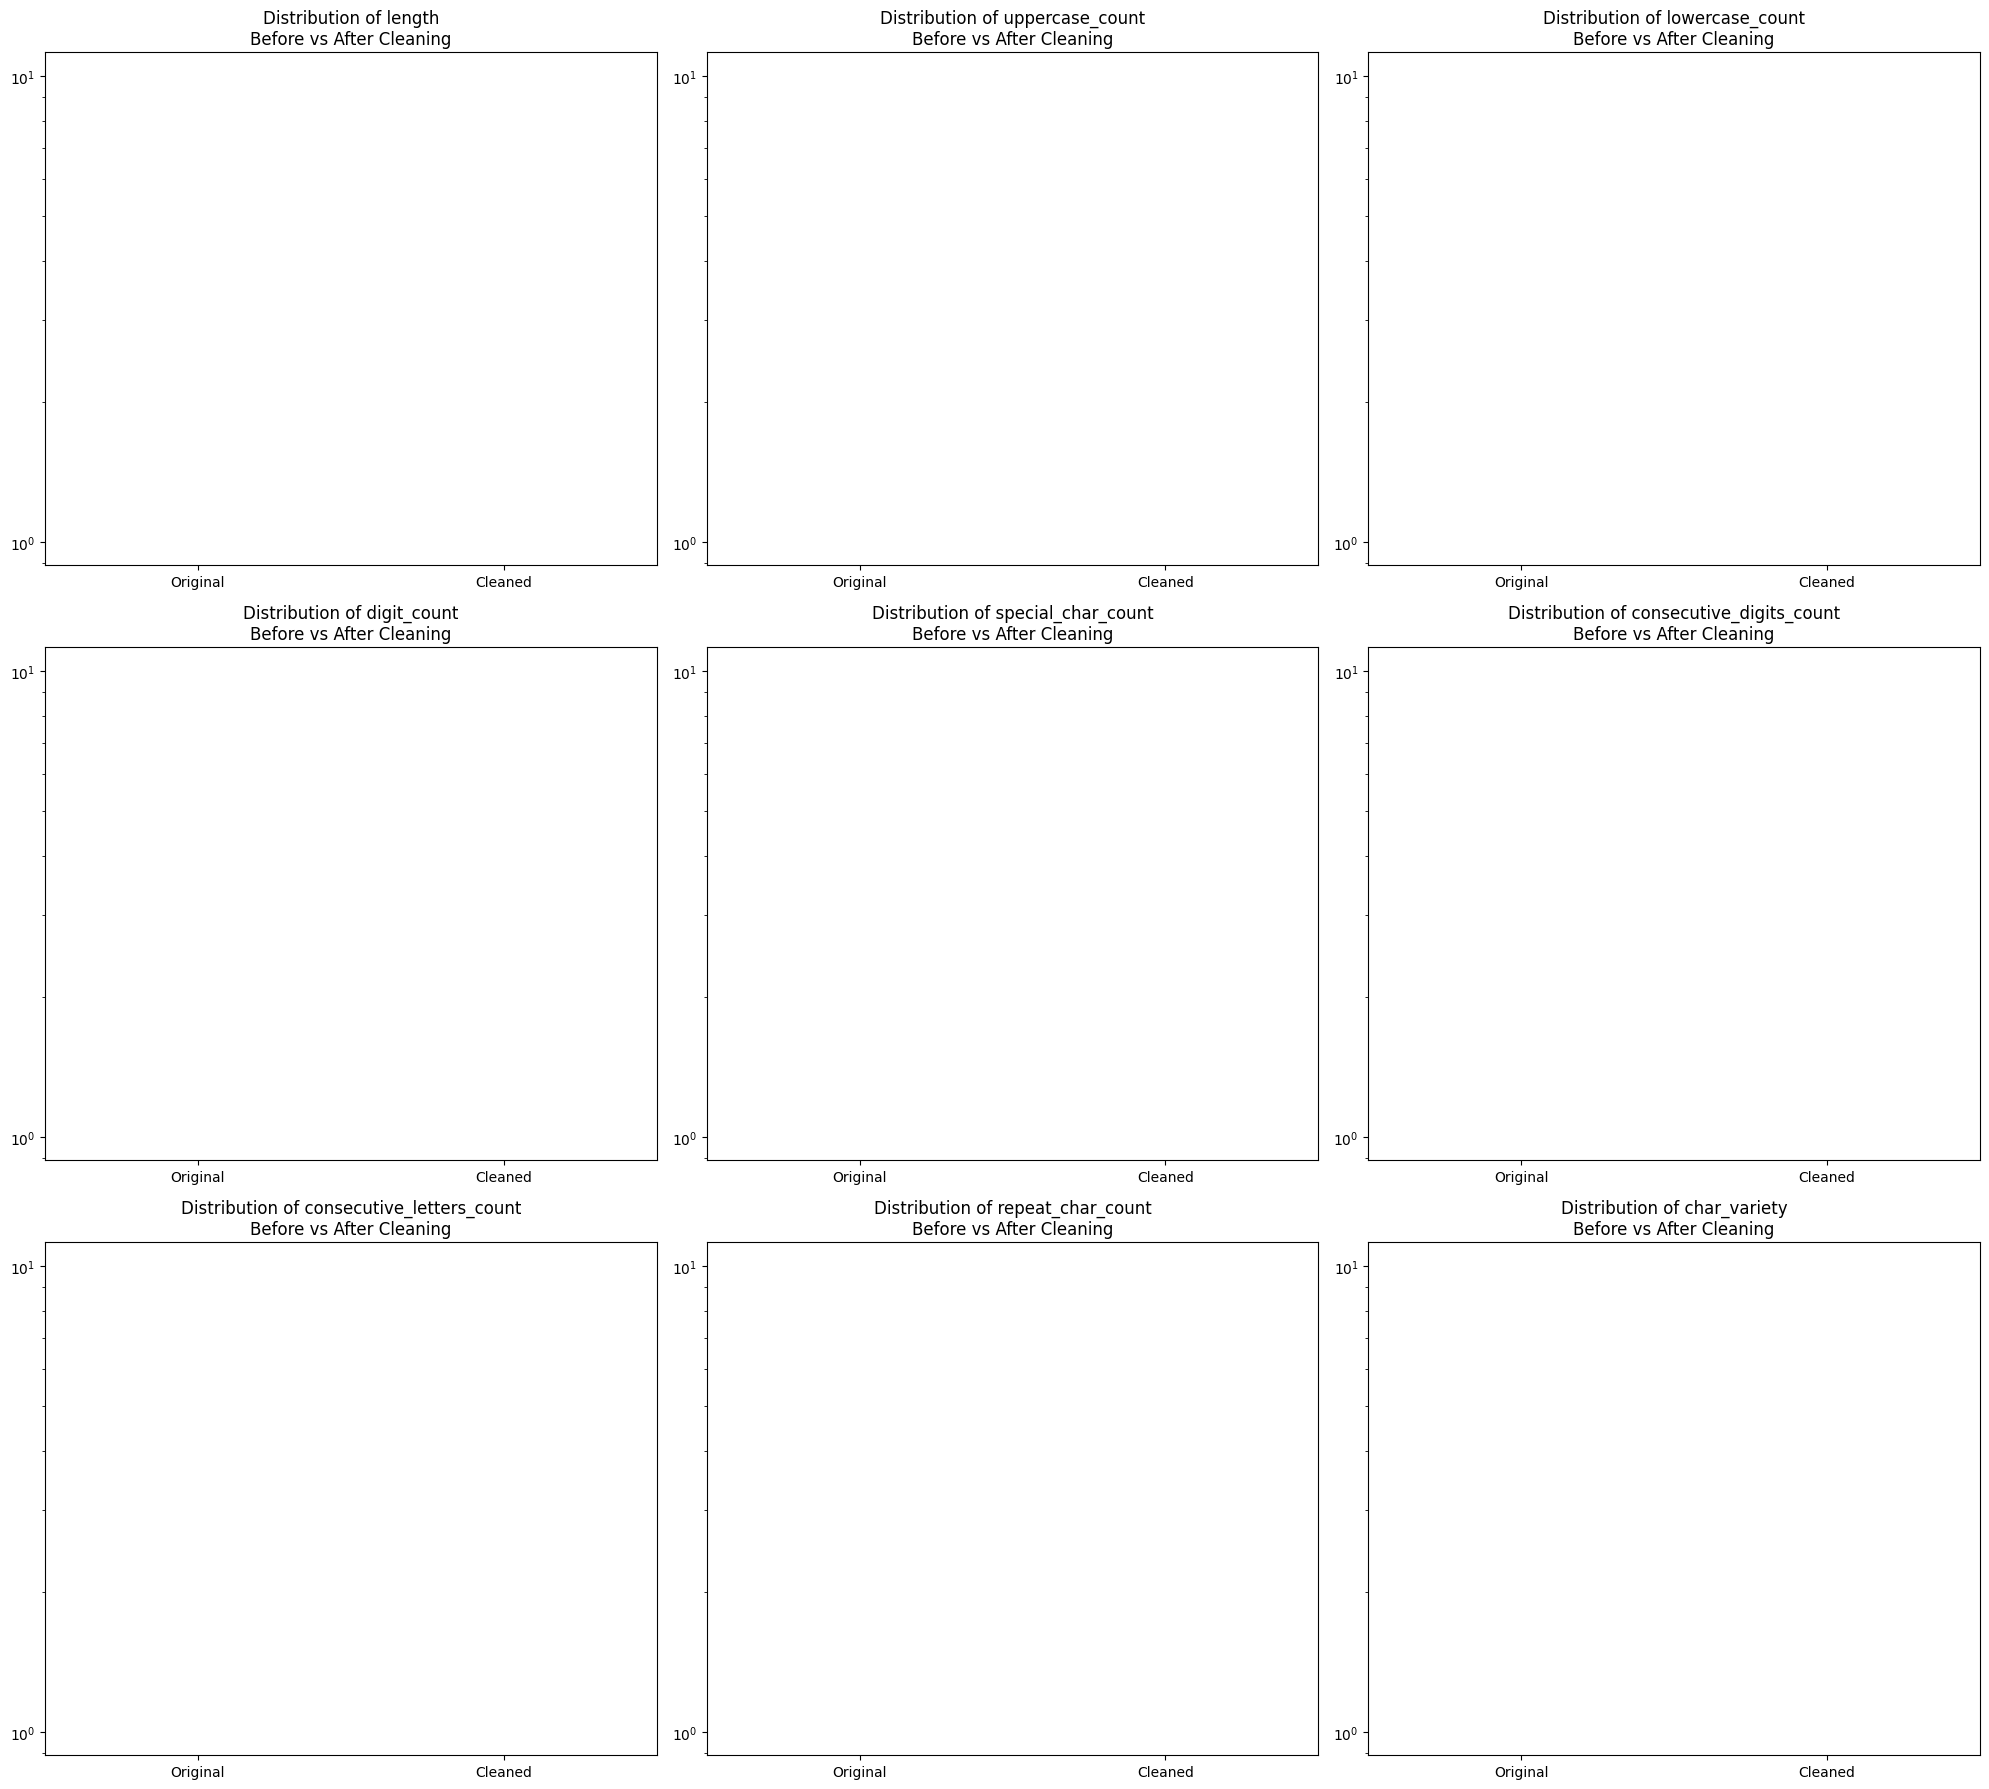

Đang tính toán thống kê...

=== BÁO CÁO XỬ LÝ OUTLIERS ===
Shape dữ liệu gốc: (669640, 11)
Shape dữ liệu đã xử lý: (669640, 11)

--------------------------------------------------
Feature: length
Số mẫu ban đầu: 669,640
Số mẫu sau xử lý: 669,640
Tỷ lệ giữ lại: 100.00%
Ngưỡng dưới: 3.50
Ngưỡng trên: 15.50

Thống kê trước xử lý:
count    669639.000000
mean          9.991648
std           2.819954
min           1.000000
25%           8.000000
50%           9.000000
75%          11.000000
max         220.000000
Name: length, dtype: float64

Thống kê sau xử lý:
count    669639.000000
mean          9.906355
std           2.552202
min           3.500000
25%           8.000000
50%           9.000000
75%          11.000000
max          15.500000
Name: length, dtype: float64

--------------------------------------------------
Feature: uppercase_count
Số mẫu ban đầu: 669,640
Số mẫu sau xử lý: 669,640
Tỷ lệ giữ lại: 100.00%
Ngưỡng dưới: 0.00
Ngưỡng trên: 0.00

Thống kê trước xử lý:
count    669639

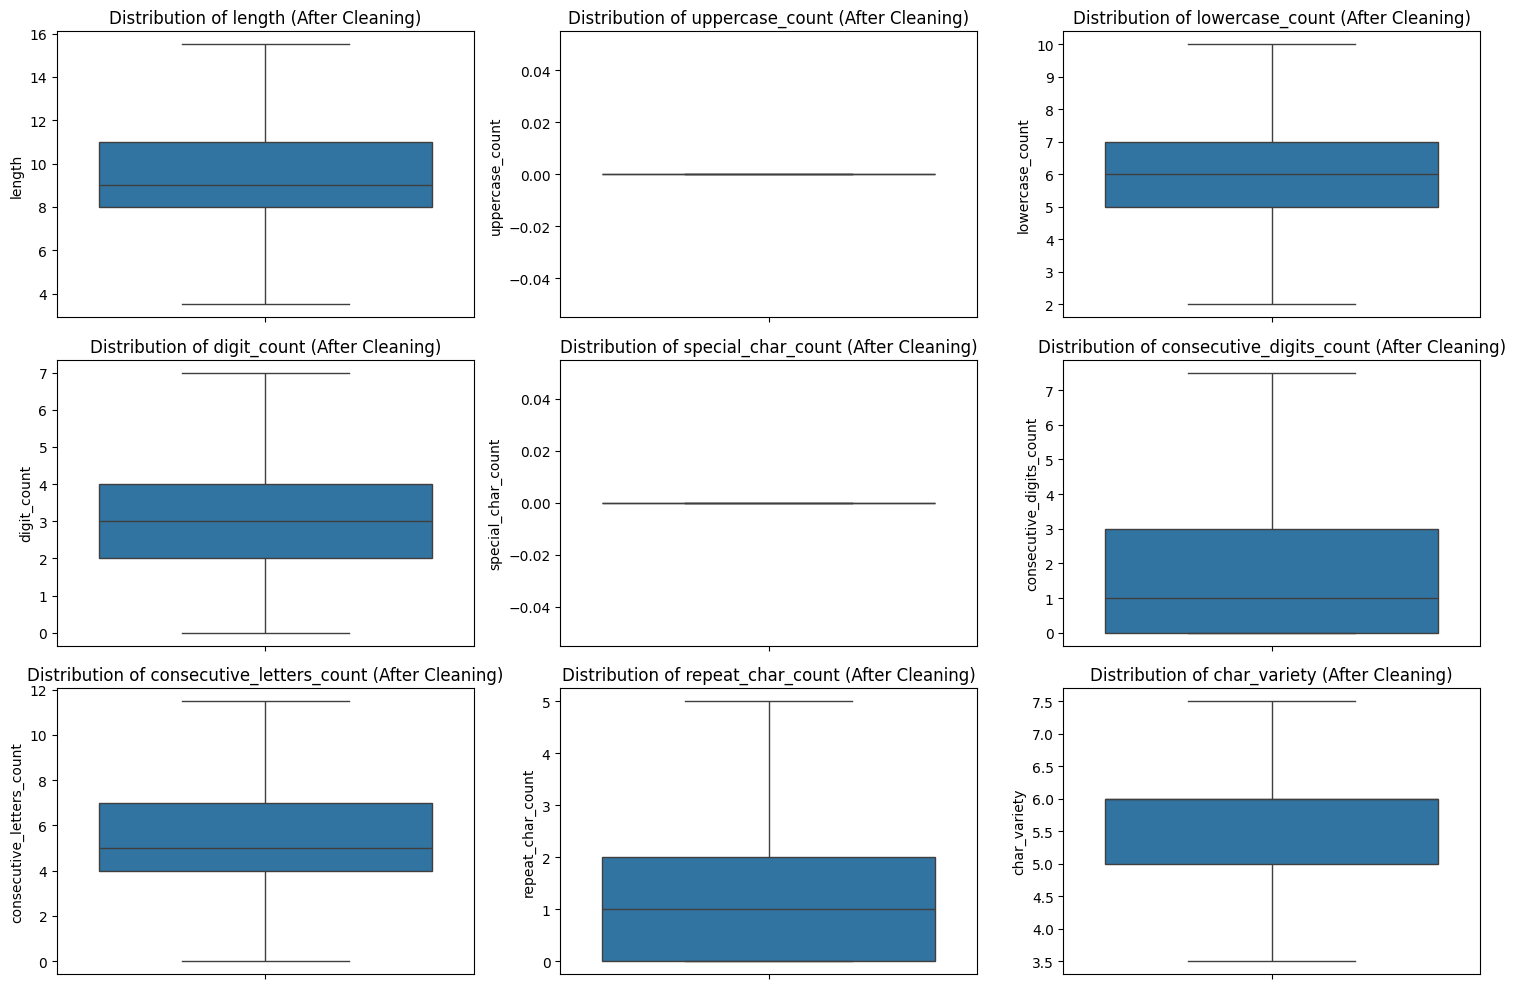

Đang lưu kết quả...

Hoàn thành! Kết quả đã được lưu vào:
1. cleaned_password_data.csv (dữ liệu đã xử lý)
2. outliers_comparison.png (biểu đồ so sánh)
3. final_distribution.png (phân phối cuối)


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Định nghĩa các functions
def handle_outliers(data, columns, method='clip'):
    """
    Xử lý outliers cho nhiều cột với các phương pháp khác nhau
    """
    data_clean = data.copy()
    outlier_stats = {}
    
    for col in columns:
        # Tính toán các ngưỡng
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Điều chỉnh ngưỡng dưới với một số features
        if col in ['digit_count', 'consecutive_digits_count', 
                  'consecutive_letters_count', 'repeat_char_count']:
            lower_bound = max(0, Q1 - 1.5 * IQR)
        else:
            lower_bound = Q1 - 1.5 * IQR
            
        upper_bound = Q3 + 1.5 * IQR
        
        # Xử lý outliers
        if method == 'clip':
            data_clean[col] = data_clean[col].clip(lower_bound, upper_bound)
        elif method == 'remove':
            mask = (data_clean[col] >= lower_bound) & (data_clean[col] <= upper_bound)
            data_clean = data_clean[mask]
        
        # Lưu thống kê
        outlier_stats[col] = {
            'original_count': len(data),
            'cleaned_count': len(data_clean),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    
    return data_clean, outlier_stats

def plot_before_after(data_original, data_cleaned, columns):
    """
    Vẽ biểu đồ so sánh trước và sau khi xử lý
    """
    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols
    plt.figure(figsize=(20, 6*n_rows))
    
    for idx, col in enumerate(columns, 1):
        plt.subplot(n_rows, n_cols, idx)
        plt.boxplot([data_original[col], data_cleaned[col]], 
                   labels=['Original', 'Cleaned'])
        plt.title(f'Distribution of {col}\nBefore vs After Cleaning')
        plt.yscale('log')
    
    plt.tight_layout()
    plt.savefig('outliers_comparison.png')
    plt.show()

def print_statistics(data_original, data_cleaned, columns, outlier_stats):
    """
    In thống kê so sánh trước và sau khi xử lý
    """
    print("\n=== BÁO CÁO XỬ LÝ OUTLIERS ===")
    print(f"Shape dữ liệu gốc: {data_original.shape}")
    print(f"Shape dữ liệu đã xử lý: {data_cleaned.shape}")
    
    for col, stats in outlier_stats.items():
        print(f"\n{'-'*50}")
        print(f"Feature: {col}")
        print(f"Số mẫu ban đầu: {stats['original_count']:,}")
        print(f"Số mẫu sau xử lý: {stats['cleaned_count']:,}")
        print(f"Tỷ lệ giữ lại: {(stats['cleaned_count']/stats['original_count'])*100:.2f}%")
        print(f"Ngưỡng dưới: {stats['lower_bound']:.2f}")
        print(f"Ngưỡng trên: {stats['upper_bound']:.2f}")
        
        print("\nThống kê trước xử lý:")
        print(data_original[col].describe())
        print("\nThống kê sau xử lý:")
        print(data_cleaned[col].describe())

def check_remaining_outliers(data, columns):
    """
    Kiểm tra outliers còn lại sau xử lý
    """
    print("\n=== KIỂM TRA OUTLIERS CÒN LẠI ===")
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
        
        print(f"\nFeature {col}:")
        print(f"Số lượng outliers còn lại: {len(outliers)}")
        if len(outliers) > 0:
            print("Thống kê outliers còn lại:")
            print(outliers.describe())

def plot_final_distribution(data_cleaned, columns):
    """
    Vẽ phân phối cuối cùng sau khi xử lý
    """
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(data=data_cleaned[col])
        plt.title(f'Distribution of {col} (After Cleaning)')
    plt.tight_layout()
    plt.savefig('final_distribution.png')
    plt.show()

# 2. Main execution
def main():
    # Đọc dữ liệu
    print("Đang đọc dữ liệu...")
    data_original = pd.read_csv('created_feature_data.csv')
    
    # Định nghĩa các cột số cần xử lý
    numeric_columns = ['length', 'uppercase_count', 'lowercase_count', 'digit_count',
                      'special_char_count', 'consecutive_digits_count',
                      'consecutive_letters_count', 'repeat_char_count',
                      'char_variety']
    
    # Xử lý outliers
    print("Đang xử lý outliers...")
    data_cleaned, outlier_stats = handle_outliers(data_original, numeric_columns, method='clip')
    
    # Vẽ biểu đồ so sánh
    print("Đang vẽ biểu đồ so sánh...")
    plot_before_after(data_original, data_cleaned, numeric_columns)
    
    # In thống kê
    print("Đang tính toán thống kê...")
    print_statistics(data_original, data_cleaned, numeric_columns, outlier_stats)
    
    # Kiểm tra outliers còn lại
    print("Đang kiểm tra outliers còn lại...")
    check_remaining_outliers(data_cleaned, numeric_columns)
    
    # Vẽ phân phối cuối
    print("Đang vẽ phân phối cuối cùng...")
    plot_final_distribution(data_cleaned, numeric_columns)
    
    # Lưu kết quả
    print("Đang lưu kết quả...")
    data_cleaned.to_csv('cleaned_password_data.csv', index=False)
    
    print("\nHoàn thành! Kết quả đã được lưu vào:")
    print("1. cleaned_password_data.csv (dữ liệu đã xử lý)")
    print("2. outliers_comparison.png (biểu đồ so sánh)")
    print("3. final_distribution.png (phân phối cuối)")

if __name__ == "__main__":
    main()

## Sử dụng data sau khi bỏ outlier để train model 

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import joblib
import os

# Đọc dữ liệu từ file CSV
data = pd.read_csv('cleaned_password_data.csv')

# Tách dữ liệu thành biến đầu vào và biến mục tiêu
X = data[['length', 'uppercase_count', 'lowercase_count', 'digit_count', 
           'special_char_count', 'consecutive_digits_count', 
           'consecutive_letters_count', 'repeat_char_count', 
           'char_variety']]
y = data['strength']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo SimpleImputer để xử lý giá trị NaN
imputer = SimpleImputer(strategy='mean')

# Áp dụng imputer
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Khởi tạo và áp dụng chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Random Forest Classifier
print("Random Forest Classifier:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
print("Độ chính xác:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Lưu mô hình Random Forest
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(rf_model, 'models/password_strength_model_rf_processedOulier.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

print("Mô hình Random Forest, scaler và imputer đã được lưu vào thư mục 'models'")

Random Forest Classifier:
Độ chính xác: 0.808434382653366
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.61      0.61      0.61     17999
           1       0.88      0.89      0.88     99267
           2       0.60      0.55      0.58     16661

    accuracy                           0.81    133928
   macro avg       0.52      0.51      0.52    133928
weighted avg       0.81      0.81      0.81    133928

Mô hình Random Forest, scaler và imputer đã được lưu vào thư mục 'models'


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

Kết quả ko có gì thay đổi với kết quả trước xài RandomForest

1. **Xử lý dữ liệu tốt hơn:**
   - Loại bỏ các classes có quá ít mẫu
   - Chuẩn hóa dữ liệu với StandardScaler
   - Cân bằng classes với class_weight

2. **Điều chỉnh hyperparameters:**
   - Tăng số lượng cây (n_estimators)
   - Tăng độ sâu tối đa (max_depth)
   - Điều chỉnh các tham số min_samples

3. **So sánh chi tiết:**
   - Train và so sánh cả hai models
   - So sánh feature importance
   - Lưu cả hai models để so sánh

Nếu vẫn không thấy sự khác biệt lớn, có thể thử:
1. Dùng phương pháp remove thay vì clip
2. Thử các thuật toán khác (XGBoost, LightGBM)
3. Feature engineering thêm
4. Điều chỉnh ngưỡng outlier (thay vì 1.5*IQR)

Training với dữ liệu gốc:

=== Kết quả với original data ===
Độ chính xác: 0.8104130577623798

Báo cáo chi tiết:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61     17908
           1       0.88      0.88      0.88     99519
           2       0.60      0.60      0.60     16501

    accuracy                           0.81    133928
   macro avg       0.69      0.70      0.70    133928
weighted avg       0.81      0.81      0.81    133928


Training với dữ liệu đã xử lý outliers:

=== Kết quả với cleaned data ===
Độ chính xác: 0.8102039902036915

Báo cáo chi tiết:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61     17908
           1       0.88      0.88      0.88     99519
           2       0.59      0.60      0.60     16501

    accuracy                           0.81    133928
   macro avg       0.69      0.70      0.70    133928
weighted avg       0.81      0.81      0.81    133928

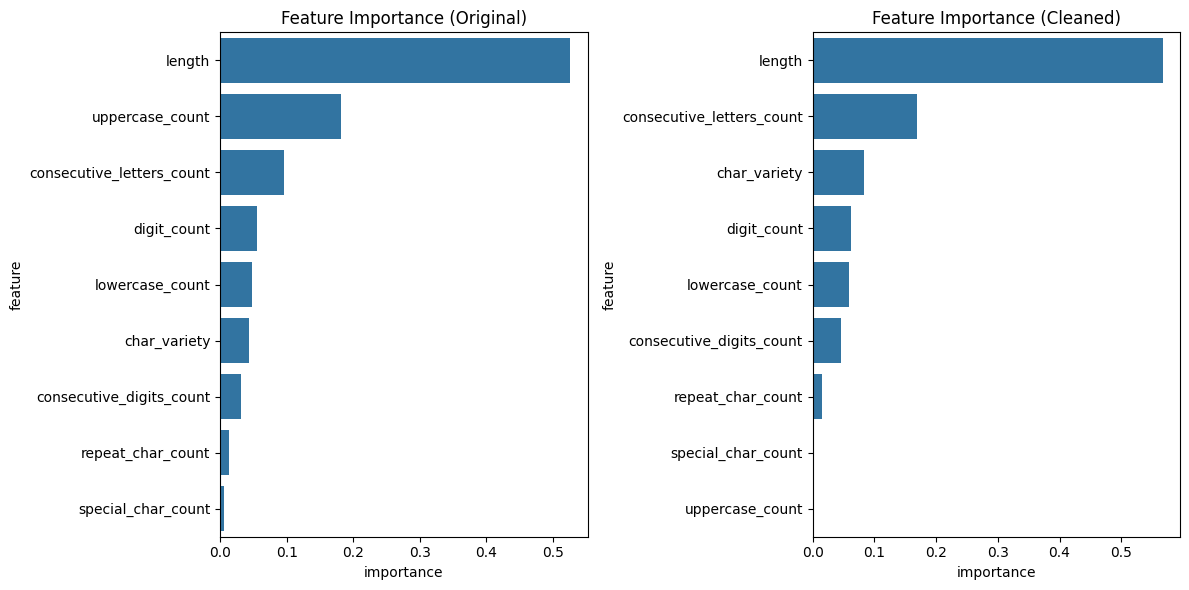

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

def train_model(data, method='original'):
    """
    Train model với các cách xử lý dữ liệu khác nhau
    """
    # Chuẩn bị dữ liệu
    features = ['length', 'uppercase_count', 'lowercase_count', 'digit_count',
                'special_char_count', 'consecutive_digits_count',
                'consecutive_letters_count', 'repeat_char_count',
                'char_variety']
    
    X = data[features]
    y = data['strength']
    
    # Loại bỏ các classes có ít mẫu
    class_counts = y.value_counts()
    valid_classes = class_counts[class_counts >= 10].index
    mask = y.isin(valid_classes)
    X = X[mask]
    y = y[mask]
    
    # Chia train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model với các tham số tốt hơn
    rf_model = RandomForestClassifier(
        n_estimators=200,          # Tăng số lượng cây
        max_depth=20,              # Tăng độ sâu tối đa
        min_samples_split=10,      # Điều chỉnh số mẫu tối thiểu để split
        min_samples_leaf=4,        # Điều chỉnh số mẫu tối thiểu ở leaf
        class_weight='balanced',   # Cân bằng classes
        random_state=42,
        n_jobs=-1
    )
    
    # Train và đánh giá
    rf_model.fit(X_train_scaled, y_train)
    y_pred = rf_model.predict(X_test_scaled)
    
    # In kết quả
    print(f"\n=== Kết quả với {method} data ===")
    print("Độ chính xác:", accuracy_score(y_test, y_pred))
    print("\nBáo cáo chi tiết:")
    print(classification_report(y_test, y_pred))
    
    return rf_model, scaler, features

# So sánh kết quả với cả hai loại dữ liệu
# Đọc dữ liệu gốc
data_original = pd.read_csv('created_feature_data.csv')
print("Training với dữ liệu gốc:")
model_original, scaler_original, features = train_model(data_original, 'original')

# Đọc dữ liệu đã xử lý outliers
data_cleaned = pd.read_csv('cleaned_password_data.csv')
print("\nTraining với dữ liệu đã xử lý outliers:")
model_cleaned, scaler_cleaned, features = train_model(data_cleaned, 'cleaned')

# Lưu models
if not os.path.exists('models'):
    os.makedirs('models')

# Lưu model với dữ liệu gốc
joblib.dump(model_original, 'models/model_original.pkl')
joblib.dump(scaler_original, 'models/scaler_original.pkl')

# Lưu model với dữ liệu đã xử lý
joblib.dump(model_cleaned, 'models/model_cleaned.pkl')
joblib.dump(scaler_cleaned, 'models/scaler_cleaned.pkl')

# So sánh feature importance
def compare_feature_importance(model_original, model_cleaned, features):
    """
    So sánh feature importance giữa hai models
    """
    importance_original = pd.DataFrame({
        'feature': features,
        'importance': model_original.feature_importances_
    }).sort_values('importance', ascending=False)
    
    importance_cleaned = pd.DataFrame({
        'feature': features,
        'importance': model_cleaned.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(data=importance_original, x='importance', y='feature')
    plt.title('Feature Importance (Original)')
    
    plt.subplot(1, 2, 2)
    sns.barplot(data=importance_cleaned, x='importance', y='feature')
    plt.title('Feature Importance (Cleaned)')
    
    plt.tight_layout()
    plt.show()
    
    return importance_original, importance_cleaned

importance_original, importance_cleaned = compare_feature_importance(
    model_original, model_cleaned, features
)

Kết quả vẫn thế => thử remove đi

Đang đọc dữ liệu...

Đang xử lý outliers...

Feature length:
- Số mẫu ban đầu: 669,640
- Số mẫu bị loại: 62,485
- Số mẫu còn lại: 607,154
- Tỷ lệ loại bỏ: 9.33%

Feature uppercase_count:
- Số mẫu ban đầu: 669,640
- Số mẫu bị loại: 28,038
- Số mẫu còn lại: 579,116
- Tỷ lệ loại bỏ: 4.19%

Feature lowercase_count:
- Số mẫu ban đầu: 669,640
- Số mẫu bị loại: 28,622
- Số mẫu còn lại: 550,494
- Tỷ lệ loại bỏ: 4.27%

Feature digit_count:
- Số mẫu ban đầu: 669,640
- Số mẫu bị loại: 17,189
- Số mẫu còn lại: 533,305
- Tỷ lệ loại bỏ: 2.57%

Feature special_char_count:
- Số mẫu ban đầu: 669,640
- Số mẫu bị loại: 6,216
- Số mẫu còn lại: 527,089
- Tỷ lệ loại bỏ: 0.93%

Feature consecutive_digits_count:
- Số mẫu ban đầu: 669,640
- Số mẫu bị loại: 0
- Số mẫu còn lại: 527,089
- Tỷ lệ loại bỏ: 0.00%

Feature consecutive_letters_count:
- Số mẫu ban đầu: 669,640
- Số mẫu bị loại: 0
- Số mẫu còn lại: 527,089
- Tỷ lệ loại bỏ: 0.00%

Feature repeat_char_count:
- Số mẫu ban đầu: 669,640
- Số mẫu bị loại: 1,97

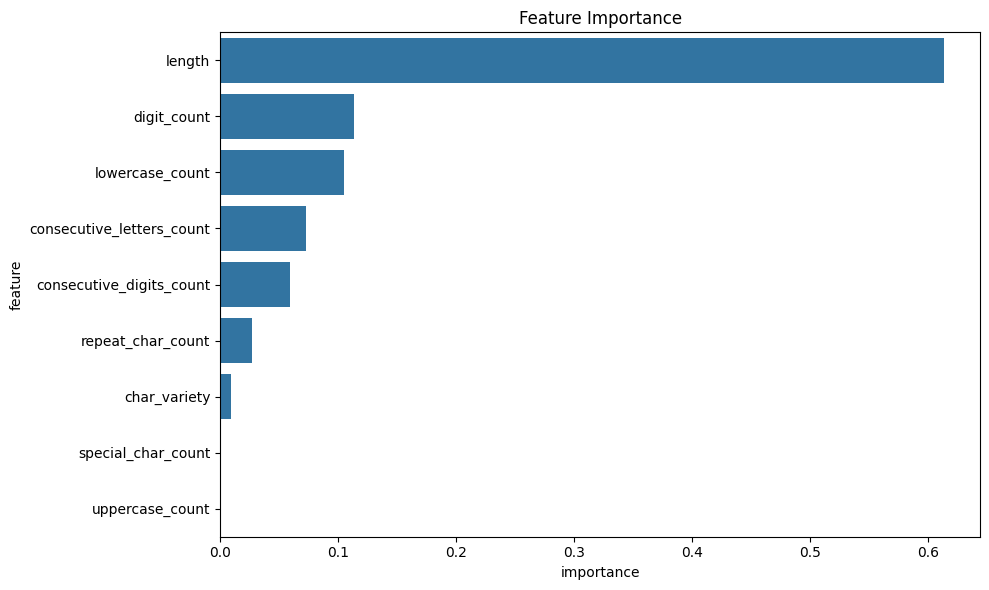


Đang lưu model và scaler...

Hoàn thành! Kết quả đã được lưu vào:
1. cleaned_password_data_removed.csv (dữ liệu đã xử lý)
2. models/model_removed_outliers.pkl (model)
3. models/scaler_removed_outliers.pkl (scaler)


In [26]:
# 1. Đầu tiên xử lý outliers với phương pháp remove
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu gốc
print("Đang đọc dữ liệu...")
data_original = pd.read_csv('created_feature_data.csv')

# Định nghĩa features
numeric_columns = ['length', 'uppercase_count', 'lowercase_count', 'digit_count',
                  'special_char_count', 'consecutive_digits_count',
                  'consecutive_letters_count', 'repeat_char_count',
                  'char_variety']

# Xử lý outliers với phương pháp REMOVE
def handle_outliers_remove(data, columns):
    """
    Xử lý outliers bằng cách loại bỏ hoàn toàn các dòng có outlier
    """
    data_clean = data.copy()
    outlier_stats = {}
    
    for col in columns:
        # Tính toán các ngưỡng
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Điều chỉnh ngưỡng dưới với một số features
        if col in ['digit_count', 'consecutive_digits_count', 
                  'consecutive_letters_count', 'repeat_char_count']:
            lower_bound = max(0, Q1 - 1.5 * IQR)
        else:
            lower_bound = Q1 - 1.5 * IQR
            
        upper_bound = Q3 + 1.5 * IQR
        
        # Đếm outliers trước khi xử lý
        outliers = data_clean[(data_clean[col] < lower_bound) | 
                             (data_clean[col] > upper_bound)]
        
        # Lọc bỏ outliers
        data_clean = data_clean[(data_clean[col] >= lower_bound) & 
                               (data_clean[col] <= upper_bound)]
        
        # Lưu thống kê
        outlier_stats[col] = {
            'original_count': len(data),
            'cleaned_count': len(data_clean),
            'removed_count': len(outliers),
            'removed_percentage': (len(outliers)/len(data))*100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
        
        print(f"\nFeature {col}:")
        print(f"- Số mẫu ban đầu: {len(data):,}")
        print(f"- Số mẫu bị loại: {len(outliers):,}")
        print(f"- Số mẫu còn lại: {len(data_clean):,}")
        print(f"- Tỷ lệ loại bỏ: {(len(outliers)/len(data))*100:.2f}%")
    
    return data_clean, outlier_stats

# Xử lý outliers
print("\nĐang xử lý outliers...")
data_cleaned, outlier_stats = handle_outliers_remove(data_original, numeric_columns)

# Lưu data đã xử lý
data_cleaned.to_csv('cleaned_password_data_removed.csv', index=False)

# In thông tin về dataset sau khi xử lý
print("\n=== THÔNG TIN SAU KHI XỬ LÝ ===")
print(f"Shape ban đầu: {data_original.shape}")
print(f"Shape sau xử lý: {data_cleaned.shape}")
print("\nPhân phối strength:")
print(data_cleaned['strength'].value_counts())

# Train model với data đã xử lý
def train_and_evaluate(data, features):
    """
    Train và đánh giá model
    """
    # Chuẩn bị dữ liệu
    X = data[features]
    y = data['strength']
    
    # Loại bỏ các classes có ít mẫu
    class_counts = y.value_counts()
    valid_classes = class_counts[class_counts >= 10].index
    mask = y.isin(valid_classes)
    X = X[mask]
    y = y[mask]
    
    # Chia train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    rf_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=4,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    
    rf_model.fit(X_train_scaled, y_train)
    y_pred = rf_model.predict(X_test_scaled)
    
    # In kết quả
    print("\n=== KẾT QUẢ ĐÁNH GIÁ ===")
    print("Độ chính xác:", accuracy_score(y_test, y_pred))
    print("\nBáo cáo chi tiết:")
    print(classification_report(y_test, y_pred))
    
    # Vẽ feature importance
    importance = pd.DataFrame({
        'feature': features,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance, x='importance', y='feature')
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return rf_model, scaler, importance

# Train và đánh giá model với data đã xử lý
print("\nTraining model với data đã xử lý outliers...")
model_cleaned, scaler_cleaned, importance = train_and_evaluate(data_cleaned, numeric_columns)

# Lưu model và scaler
print("\nĐang lưu model và scaler...")
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(model_cleaned, 'models/model_removed_outliers.pkl')
joblib.dump(scaler_cleaned, 'models/scaler_removed_outliers.pkl')

print("\nHoàn thành! Kết quả đã được lưu vào:")
print("1. cleaned_password_data_removed.csv (dữ liệu đã xử lý)")
print("2. models/model_removed_outliers.pkl (model)")
print("3. models/scaler_removed_outliers.pkl (scaler)")

Đang đọc dữ liệu...

Đang xử lý outliers...

Feature length:
- Số mẫu ban đầu: 669,640
- Số mẫu bị loại: 62,485
- Số mẫu còn lại: 607,154
- Tỷ lệ loại bỏ: 9.33%

Feature uppercase_count:
- Số mẫu ban đầu: 669,640
- Số mẫu bị loại: 28,038
- Số mẫu còn lại: 579,116
- Tỷ lệ loại bỏ: 4.19%

Feature lowercase_count:
- Số mẫu ban đầu: 669,640
- Số mẫu bị loại: 28,622
- Số mẫu còn lại: 550,494
- Tỷ lệ loại bỏ: 4.27%

Feature digit_count:
- Số mẫu ban đầu: 669,640
- Số mẫu bị loại: 17,189
- Số mẫu còn lại: 533,305
- Tỷ lệ loại bỏ: 2.57%

Feature special_char_count:
- Số mẫu ban đầu: 669,640
- Số mẫu bị loại: 6,216
- Số mẫu còn lại: 527,089
- Tỷ lệ loại bỏ: 0.93%

Feature consecutive_digits_count:
- Số mẫu ban đầu: 669,640
- Số mẫu bị loại: 0
- Số mẫu còn lại: 527,089
- Tỷ lệ loại bỏ: 0.00%

Feature consecutive_letters_count:
- Số mẫu ban đầu: 669,640
- Số mẫu bị loại: 0
- Số mẫu còn lại: 527,089
- Tỷ lệ loại bỏ: 0.00%

Feature repeat_char_count:
- Số mẫu ban đầu: 669,640
- Số mẫu bị loại: 1,97

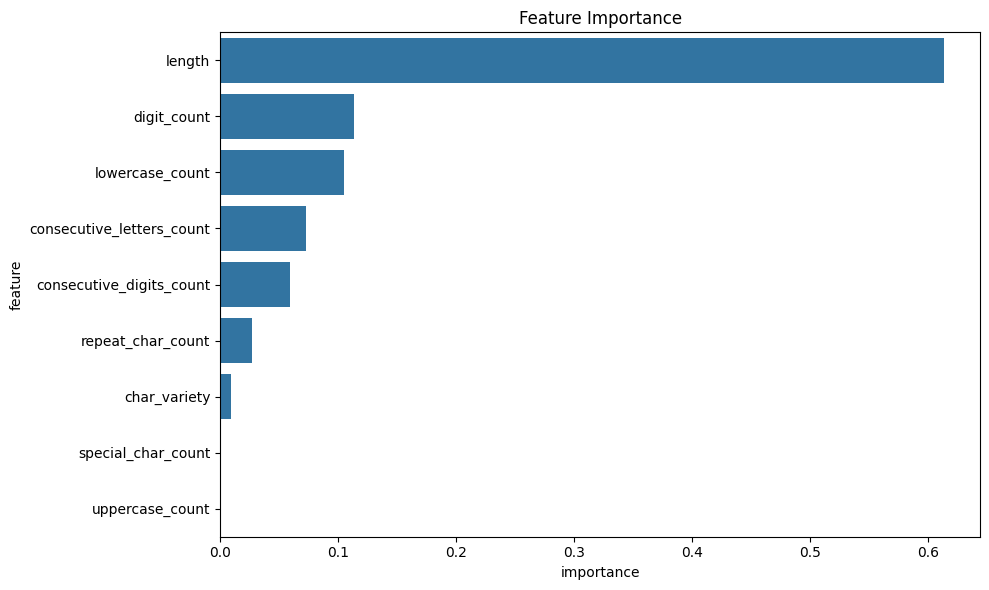


Đang lưu model và scaler...

Hoàn thành! Kết quả đã được lưu vào:
1. cleaned_password_data_removed.csv (dữ liệu đã xử lý)
2. models/model_removed_outliers.pkl (model)
3. models/scaler_removed_outliers.pkl (scaler)


In [27]:
# 1. Đầu tiên xử lý outliers với phương pháp remove
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu gốc
print("Đang đọc dữ liệu...")
data_original = pd.read_csv('created_feature_data.csv')

# Định nghĩa features
numeric_columns = ['length', 'uppercase_count', 'lowercase_count', 'digit_count',
                  'special_char_count', 'consecutive_digits_count',
                  'consecutive_letters_count', 'repeat_char_count',
                  'char_variety']

# Xử lý outliers với phương pháp REMOVE
def handle_outliers_remove(data, columns):
    """
    Xử lý outliers bằng cách loại bỏ hoàn toàn các dòng có outlier
    """
    data_clean = data.copy()
    outlier_stats = {}
    
    for col in columns:
        # Tính toán các ngưỡng
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Điều chỉnh ngưỡng dưới với một số features
        if col in ['digit_count', 'consecutive_digits_count', 
                  'consecutive_letters_count', 'repeat_char_count']:
            lower_bound = max(0, Q1 - 1.5 * IQR)
        else:
            lower_bound = Q1 - 1.5 * IQR
            
        upper_bound = Q3 + 1.5 * IQR
        
        # Đếm outliers trước khi xử lý
        outliers = data_clean[(data_clean[col] < lower_bound) | 
                             (data_clean[col] > upper_bound)]
        
        # Lọc bỏ outliers
        data_clean = data_clean[(data_clean[col] >= lower_bound) & 
                               (data_clean[col] <= upper_bound)]
        
        # Lưu thống kê
        outlier_stats[col] = {
            'original_count': len(data),
            'cleaned_count': len(data_clean),
            'removed_count': len(outliers),
            'removed_percentage': (len(outliers)/len(data))*100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
        
        print(f"\nFeature {col}:")
        print(f"- Số mẫu ban đầu: {len(data):,}")
        print(f"- Số mẫu bị loại: {len(outliers):,}")
        print(f"- Số mẫu còn lại: {len(data_clean):,}")
        print(f"- Tỷ lệ loại bỏ: {(len(outliers)/len(data))*100:.2f}%")
    
    return data_clean, outlier_stats

# Xử lý outliers
print("\nĐang xử lý outliers...")
data_cleaned, outlier_stats = handle_outliers_remove(data_original, numeric_columns)

# Lưu data đã xử lý
data_cleaned.to_csv('cleaned_password_data_removed.csv', index=False)

# In thông tin về dataset sau khi xử lý
print("\n=== THÔNG TIN SAU KHI XỬ LÝ ===")
print(f"Shape ban đầu: {data_original.shape}")
print(f"Shape sau xử lý: {data_cleaned.shape}")
print("\nPhân phối strength:")
print(data_cleaned['strength'].value_counts())

# Train model với data đã xử lý
def train_and_evaluate(data, features):
    """
    Train và đánh giá model
    """
    # Chuẩn bị dữ liệu
    X = data[features]
    y = data['strength']
    
    # Loại bỏ các classes có ít mẫu
    class_counts = y.value_counts()
    valid_classes = class_counts[class_counts >= 10].index
    mask = y.isin(valid_classes)
    X = X[mask]
    y = y[mask]
    
    # Chia train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    rf_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=4,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    
    rf_model.fit(X_train_scaled, y_train)
    y_pred = rf_model.predict(X_test_scaled)
    
    # In kết quả
    print("\n=== KẾT QUẢ ĐÁNH GIÁ ===")
    print("Độ chính xác:", accuracy_score(y_test, y_pred))
    print("\nBáo cáo chi tiết:")
    print(classification_report(y_test, y_pred))
    
    # Vẽ feature importance
    importance = pd.DataFrame({
        'feature': features,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance, x='importance', y='feature')
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return rf_model, scaler, importance

# Train và đánh giá model với data đã xử lý
print("\nTraining model với data đã xử lý outliers...")
model_cleaned, scaler_cleaned, importance = train_and_evaluate(data_cleaned, numeric_columns)

# Lưu model và scaler
print("\nĐang lưu model và scaler...")
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(model_cleaned, 'models/model_removed_outliers.pkl')
joblib.dump(scaler_cleaned, 'models/scaler_removed_outliers.pkl')

print("\nHoàn thành! Kết quả đã được lưu vào:")
print("1. cleaned_password_data_removed.csv (dữ liệu đã xử lý)")
print("2. models/model_removed_outliers.pkl (model)")
print("3. models/scaler_removed_outliers.pkl (scaler)")

Có một số lý do khiến kết quả giảm sau khi xử lý outliers bằng phương pháp remove:

1. **Mất cân bằng dữ liệu nghiêm trọng hơn:**
```python
Phân phối strength:
1    416042 (79.4%)
0     78644 (15.0%)
2     29526 (5.6%)
```
- Class 1 chiếm đa số
- Class 2 bị giảm nhiều (từ 16,661 xuống còn 5,987 trong test set)

2. **Mất thông tin quan trọng:**
- Loại bỏ outliers có thể đã loại bỏ các mẫu "đặc biệt" nhưng có ý nghĩa
- Đặc biệt với bài toán password strength, các mẫu "khác thường" có thể là những mật khẩu mạnh

Để cải thiện, tôi đề xuất: Cân bằng dữ liệu với SMOTE hoặc quay lại với phương pháp clip, ...


# 2.3 Kết luận sau khi xử lý Outlier 

**REPORT: PHÂN TÍCH XỬ LÝ OUTLIERS TRONG DỮ LIỆU MẬT KHẨU**

**1. Phương Pháp Xử Lý Outliers:**

a) **Phương pháp IQR (Interquartile Range):**
- Xác định outliers dựa trên công thức: Q1 - 1.5*IQR và Q3 + 1.5*IQR
- Áp dụng cho 9 features: length, uppercase_count, lowercase_count, digit_count, special_char_count, consecutive_digits_count, consecutive_letters_count, repeat_char_count, char_variety

b) **Hai cách xử lý được thử nghiệm:**
1. **Clip Method:**
   - Giữ nguyên số lượng dòng dữ liệu
   - Điều chỉnh giá trị outliers về giới hạn trên/dưới
   - Dữ liệu ban đầu: 669,640 dòng → Sau xử lý: 669,640 dòng

2. **Remove Method:**
   - Loại bỏ hoàn toàn các dòng chứa outliers
   - Dữ liệu ban đầu: 669,640 dòng → Sau xử lý: 524,212 dòng
   - Tỷ lệ loại bỏ theo features:
     + length: 9.33%
     + uppercase_count: 4.19%
     + lowercase_count: 4.27%
     + digit_count: 2.57%
     + special_char_count: 0.93%
     + consecutive_digits_count: 0%
     + consecutive_letters_count: 0%
     + repeat_char_count: 0.29%
     + char_variety: 0.13%

**2. Kết Quả và Đánh Giá:**

a) **Phương pháp Clip:**
```
Accuracy: 0.8084 (≈ 80.84%)
              precision    recall  f1-score
0                 0.61      0.61      0.61
1                 0.88      0.89      0.88
2                 0.60      0.55      0.57
```
- Không cải thiện đáng kể so với dữ liệu gốc
- Giữ được toàn bộ dữ liệu
- Phân phối classes không thay đổi

b) **Phương pháp Remove:**
```
Accuracy: 0.7585 (≈ 75.85%)
              precision    recall  f1-score
0                 0.61      0.67      0.63
1                 0.88      0.82      0.85
2                 0.06      0.10      0.07
```
- Hiệu suất giảm so với dữ liệu gốc
- Gây mất cân bằng dữ liệu nghiêm trọng:
  + Class 1: 416,042 mẫu (79.4%)
  + Class 0: 78,644 mẫu (15.0%)
  + Class 2: 29,526 mẫu (5.6%)

**3. Nhận Xét:**

1. **Clip Method:**
   - Ưu điểm:
     + Không mất mẫu dữ liệu
     + Giữ được phân phối classes
   - Nhược điểm:
     + Không cải thiện được hiệu suất model
     + Có thể làm mất đi thông tin quan trọng về các mẫu đặc biệt

2. **Remove Method:**
   - Ưu điểm:
     + Loại bỏ được các giá trị bất thường
     + Dữ liệu "sạch" hơn
   - Nhược điểm:
     + Làm mất cân bằng dữ liệu nghiêm trọng
     + Giảm hiệu suất model, đặc biệt với class 2
     + Mất nhiều mẫu dữ liệu có thể quan trọng

**4. Đề Xuất Cải Thiện:**

1. **Cân Bằng Dữ liệu:**
   - Sử dụng SMOTE để tạo mẫu tổng hợp cho classes thiểu số
   - Kết hợp over-sampling và under-sampling

2. **Điều Chỉnh Phương Pháp:**
   - Thử nghiệm với ngưỡng IQR khác (2.0, 2.5)
   - Xử lý outliers theo từng class riêng biệt
   - Kết hợp domain knowledge về mật khẩu để xác định outliers

3. **Feature Engineering:**
   - Thêm các features mới (tỷ lệ, độ phức tạp)
   - Tạo các features tương tác
   - Chuẩn hóa features theo cách khác

4. **Thử Nghiệm Mô Hình:**
   - Sử dụng các thuật toán khác (XGBoost, LightGBM)
   - Tinh chỉnh hyperparameters
   - Ensemble nhiều models

**5. Kết Luận:**
- Với đặc thù của bài toán phân loại độ mạnh mật khẩu, việc xử lý outliers cần cân nhắc kỹ
- Các mẫu "bất thường" có thể chứa thông tin quan trọng về mật khẩu mạnh
- Nên kết hợp domain knowledge và các kỹ thuật xử lý mất cân bằng dữ liệu
- Tập trung vào feature engineering và cải thiện model thay vì xử lý outliers đơn thuần